# Read and Distribution Table

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ast
import datetime
from operator import attrgetter

from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)

customer_path = '/content/drive/MyDrive/[SC5DS] Mockup Dataset/customer.csv'
product_path = '/content/drive/MyDrive/[SC5DS] Mockup Dataset/product.csv'
transaction_path = '/content/drive/MyDrive/[SC5DS] Mockup Dataset/transactions.csv'
click_stream_path = '/content/drive/MyDrive/[SC5DS] Mockup Dataset/click_stream.csv'

df_1 = pd.read_csv(customer_path)
df_2 = pd.read_csv(product_path, error_bad_lines=False)
df_3 = pd.read_csv(transaction_path)
df_4 = pd.read_csv(click_stream_path)

<ipython-input-3-a21f777121d2>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_2 = pd.read_csv(product_path, error_bad_lines=False)
Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping line 33020: expected 10 fields, saw 11
Skippi

## **df_1** : Customer Table

In [ ]:
df_1.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
df_1.shape

(100000, 15)

In [ ]:
df_1.describe()

,customer_id,home_location_lat,home_location_long
count,100000.000000,100000.000000,100000.000000
mean,50000.500000,-5.106390,110.936081
std,28867.657797,3.088183,6.343363
min,1.000000,-10.845002,95.275319
25%,25000.750000,-7.372650,106.860628
50%,50000.500000,-6.240087,110.162010
75%,75000.250000,-3.092254,113.171187
max,100000.000000,5.818355,140.993119


In [ ]:
df_1.dtypes

customer_id             int64
first_name             object
last_name              object
username               object
email                  object
gender                 object
birthdate              object
device_type            object
device_id              object
device_version         object
home_location_lat     float64
home_location_long    float64
home_location          object
home_country           object
first_join_date        object
dtype: object

## **df_2** : Product Table

In [ ]:
df_2.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
df_2.shape

(44424, 10)

In [ ]:
df_2.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [ ]:
df_2.dtypes

id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object

## **df_3** : Transaction Table

In [ ]:
df_3.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [ ]:
df_3.shape

(852584, 14)

In [ ]:
df_3.describe()

,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount
count,852584.000000,852584.000000,852584.000000,852584.000000,852584.000000,8.525840e+05
mean,49839.202245,2042.077949,9189.675152,-5.111961,110.966216,5.499165e+05
std,28999.324142,3063.481424,9377.856335,3.081469,6.398510,8.153761e+05
min,3.000000,0.000000,0.000000,-10.995516,95.030728,1.089800e+04
25%,24563.000000,0.000000,0.000000,-7.377923,106.863926,2.037938e+05
50%,49619.000000,0.000000,10000.000000,-6.241318,110.168478,3.029890e+05
75%,74957.000000,3993.000000,10000.000000,-3.088419,113.194940,5.147022e+05
max,99999.000000,24519.000000,50000.000000,5.874791,141.006140,2.350449e+07


In [ ]:
df_3.dtypes

created_at                 object
customer_id                 int64
booking_id                 object
session_id                 object
product_metadata           object
payment_method             object
payment_status             object
promo_amount                int64
promo_code                 object
shipment_fee                int64
shipment_date_limit        object
shipment_location_lat     float64
shipment_location_long    float64
total_amount                int64
dtype: object

## **df_4** : Click Stream Table

In [ ]:
df_4.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [ ]:
df_4.shape

(12833602, 6)

In [ ]:
df_4.describe()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
count,12833602,12833602,12833602,12833602,12833602,4289540
unique,895203,9,12814223,12833602,2,2006748
top,65383bfb-5535-445f-ab52-aec4658eb0bd,CLICK,2021-05-02T11:28:41.047631Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,{'payment_status': 'Success'}
freq,650,2498038,451,1,11548304,815962


In [ ]:
df_4.dtypes

session_id        object
event_name        object
event_time        object
event_id          object
traffic_source    object
event_metadata    object
dtype: object

# Preprocessing Data

## Detect Duplicate Data

In [ ]:
dataframes = [df_1, df_2, df_3, df_4] # simpan dataframe dalam sebuah list

def detect_duplicates_in_dataframes(dataframes):
    duplicates = set() # menggunakan set untuk menyimpan duplikat unik

    for df in dataframes:
        duplicate_rows = df[df.duplicated()]
        for index, row in duplicate_rows.iterrows():
            duplicates.add(tuple(row))

    return list(duplicates)

def print_duplicates(duplicate_data):
    print("Data duplikat:")
    for data in duplicate_data:
        print(data)

duplicate_data = detect_duplicates_in_dataframes(dataframes)
print_duplicates(duplicate_data)

Data duplikat:


Berdasarkan output tersebut, memunjukkan tidak terdeteksi adanya duplikasi data

## Detect Missing Value

In [ ]:
dataframes = [df_1, df_2, df_3, df_4] # simpan dataframe dalam sebuah list

def detect_missing_values_in_dataframes(dataframes):
    missing_values = {} # dictionary untuk menyimpan kolom dan jumlah nilai yang hilang

    for i, df in enumerate(dataframes):
        missing_values[f'Dataframe {i+1}'] = df.isnull().sum()

    return missing_values

def print_missing_values(missing_data):
    for df, missing_values in missing_data.items():
        print(f"Missing values in {df}:")
        print(missing_values)
        print("==================================================")

missing_data = detect_missing_values_in_dataframes(dataframes)
print_missing_values(missing_data)

Missing values in Dataframe 1:
customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64
Missing values in Dataframe 2:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64
Missing values in Dataframe 3:
created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                  

## Handling Missing Value

In [ ]:
# tidak ada missing value pada dataframe 1
df1 = df_1

In [ ]:
# handling missing value df_2
df2 = df_2.dropna() # dropmissing value (hapus) -> data kecil

df2['year']=df2['year'].astype(int) # mengganti tipe year dari float ke integer
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44077 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44077 non-null  int64 
 1   gender              44077 non-null  object
 2   masterCategory      44077 non-null  object
 3   subCategory         44077 non-null  object
 4   articleType         44077 non-null  object
 5   baseColour          44077 non-null  object
 6   season              44077 non-null  object
 7   year                44077 non-null  int64 
 8   usage               44077 non-null  object
 9   productDisplayName  44077 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.7+ MB


<ipython-input-7-abe391e3b0c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year']=df2['year'].astype(int) # mengganti tipe year dari float ke integer


In [ ]:
# handling missing value df_3
df_3['promo_code'] = df_3['promo_code'].fillna('No Using Promo') # mengisi kolom kosong dengan nilai default 'No Using Promo'

df3 = df_3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              852584 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
df3['promo_code'].value_counts()

No Using Promo    526048
AZ2022             89227
BUYMORE            66835
WEEKENDSERU        61941
XX2022             44744
LIBURDONG          20965
WEEKENDMANTAP      20448
SC2022             11271
STARTUP            11105
Name: promo_code, dtype: int64

In [ ]:
# handling missing value df_4
df_4['event_metadata'] = df_4['event_metadata'].fillna('{}')
df_4['event_time'] = pd.to_datetime(df_4['event_time'])

df4 = df_4
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype              
---  ------          -----              
 0   session_id      object             
 1   event_name      object             
 2   event_time      datetime64[ns, UTC]
 3   event_id        object             
 4   traffic_source  object             
 5   event_metadata  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 587.5+ MB


## Detect Outlier

Berikut adalah visualisasi boxplot untuk menunjukkan ada atau tidaknya outlier pada kolom numeric pada dataframe tertentu

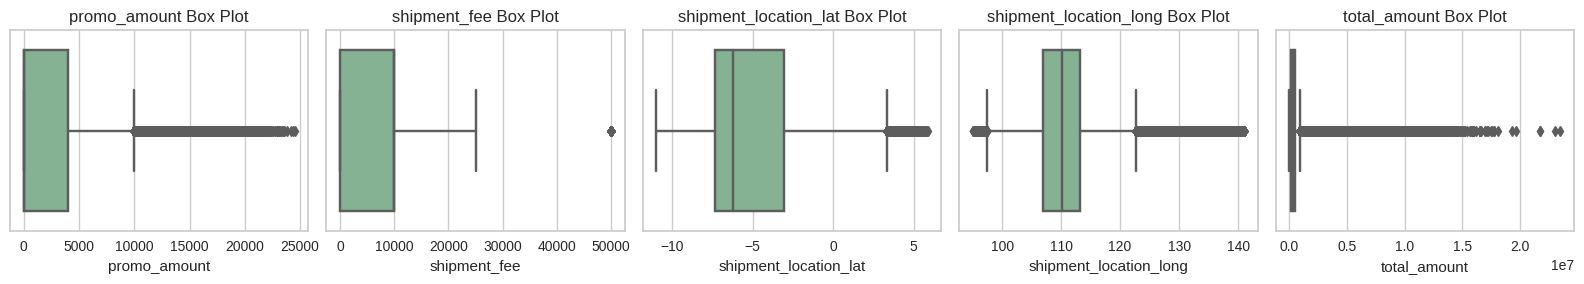

In [ ]:
df3_col = df3.select_dtypes(include=['number']).drop(columns=['customer_id'])

n_cols = 5
n_rows = len(df3_col.columns) // n_cols + 1
palette = sns.color_palette("crest")
fig, axs = plt.subplots(1, n_cols, figsize=(16, 3))

for i, kolom in enumerate(df3_col.columns):
    sns.boxplot(data=df3, x=kolom, ax=axs[i], palette=palette)
    axs[i].set_xlabel(kolom)
    axs[i].set_title(f'{kolom} Box Plot')

plt.tight_layout()
plt.show()

Outlier tidak perlu dihandling dikarenakan memiliki informasi penting yang akan berpengaruh pada hasil pola pada proses modelling

# EDA

## Berdasarkan Customer

**1. Perbandingan Gender Customer**

In [ ]:
df1.groupby(['gender'])['gender'].count()

gender
F    64230
M    35770
Name: gender, dtype: int64

<Axes: ylabel='gender'>

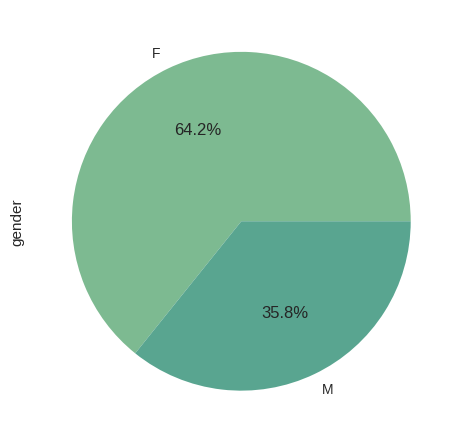

In [ ]:
df1['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=palette)

**2. Usia Customer**

In [ ]:
# Mendapatkan nilai paling baru dari kolom 'event_time' dalam df4
latest_event_time = df4['event_time'].max()
# Mendapatkan nilai paling baru dari kolom 'shipping_date_limit' dalam df3
latest_shipping_date_limit = df3['shipment_date_limit'].max()

# Menampilkan hasil
print("Nilai paling baru dari event_time dalam df4:", latest_event_time)
print("Nilai paling baru dari shipment_date_limit dalam df3:", latest_shipping_date_limit)

Nilai paling baru dari event_time dalam df4: 2022-08-01 00:49:59.408424+00:00
Nilai paling baru dari shipment_date_limit dalam df3: 2022-08-06T22:56:48.681727Z


In [ ]:
df1['birthdate'] = pd.to_datetime(df1['birthdate'])
reference_date = pd.to_datetime('2022-08-07') # diambil dari tanggal terakhir dari keseluruhan data yang masuk
df1['age'] = (reference_date - df1['birthdate']).astype('<m8[Y]')
df1['age'] = df1['age'].astype(int)

In [ ]:
ages = df1[['age']].groupby(['age'])['age'].count().reset_index(name='count').sort_values(['count'], ascending=False)

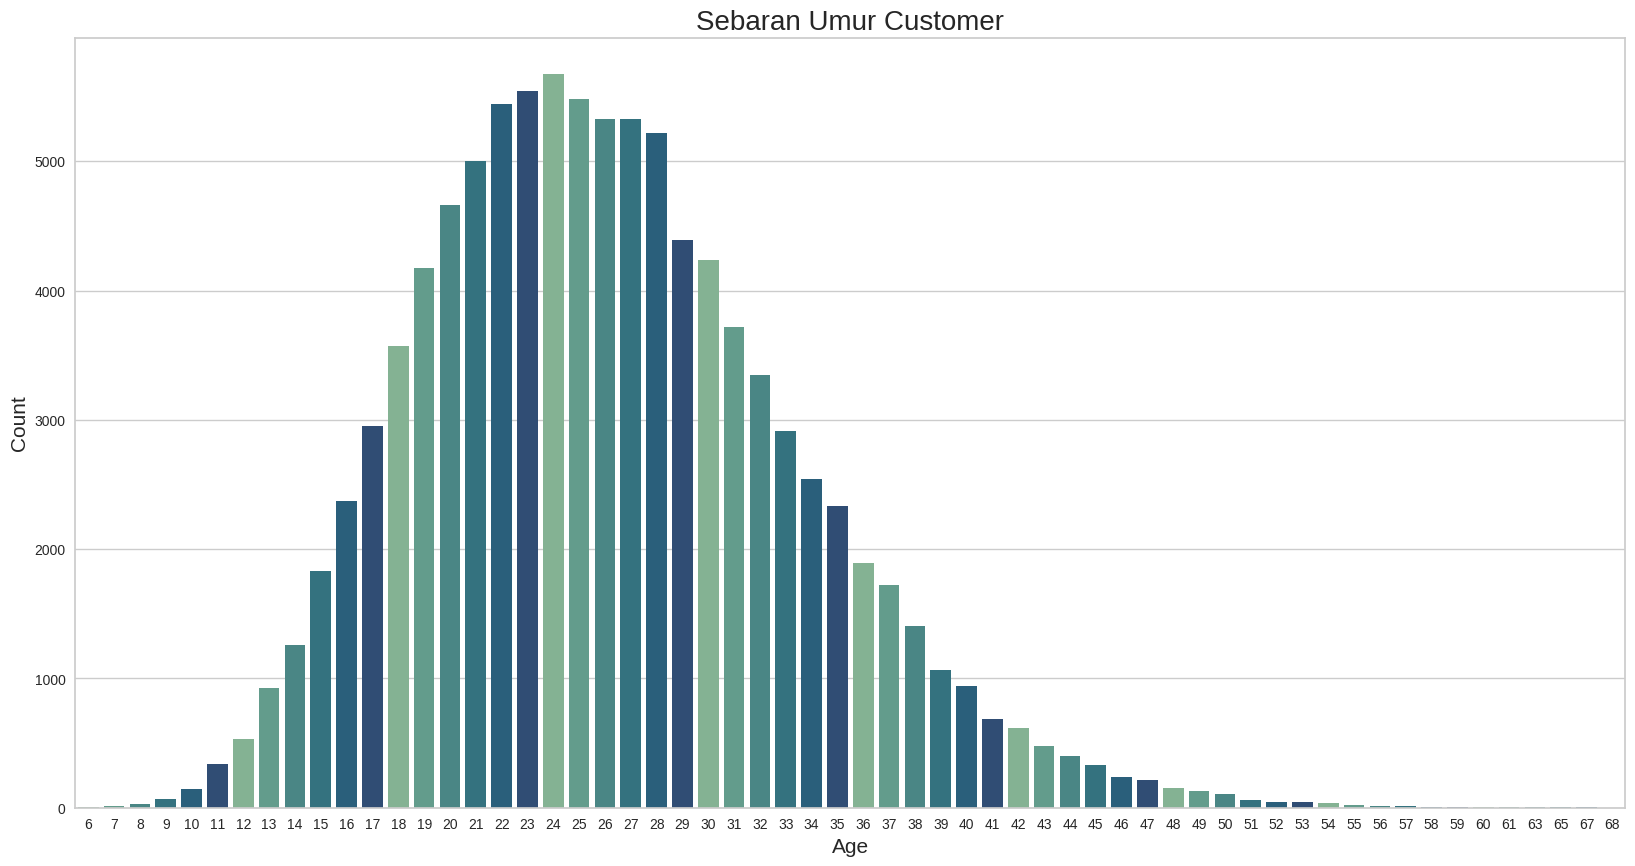

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', data=df1, palette=palette)
plt.title('Sebaran Umur Customer', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

**3. Pengguna Device**

device_type
Android    76637
iOS        23363
Name: device_type, dtype: int64


<Axes: ylabel='device_type'>

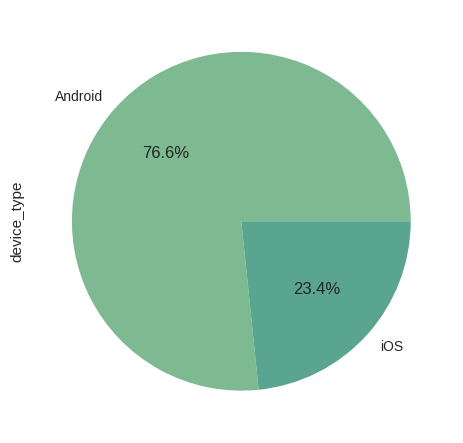

In [ ]:
print(df1.groupby(['device_type'])['device_type'].count())
df1['device_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=palette)

**4. Berdasarkan Provinsi**

In [ ]:
result = df1.groupby(['home_location'])['home_location'].count().reset_index(name='count').sort_values(by='count', ascending=False)
print(result)

          home_location  count
6          Jakarta Raya  18715
8            Jawa Barat  11486
9           Jawa Tengah  10960
10           Jawa Timur   9953
32           Yogyakarta   7849
11     Kalimantan Barat   5603
16              Lampung   5426
12   Kalimantan Selatan   4229
13    Kalimantan Tengah   4091
14     Kalimantan Timur   2729
17               Maluku   2490
15       Kepulauan Riau   1902
1                  Bali   1451
29       Sumatera Barat   1346
19  Nusa Tenggara Barat   1324
28       Sulawesi Utara   1279
24       Sulawesi Barat   1068
31       Sumatera Utara   1004
30     Sumatera Selatan    841
21                Papua    753
25     Sulawesi Selatan    726
22          Papua Barat    660
4              Bengkulu    654
20  Nusa Tenggara Timur    587
26      Sulawesi Tengah    505
7                 Jambi    385
3                Banten    377
18         Maluku Utara    368
5             Gorontalo    348
0                  Aceh    263
2       Bangka Belitung    250
27    Su

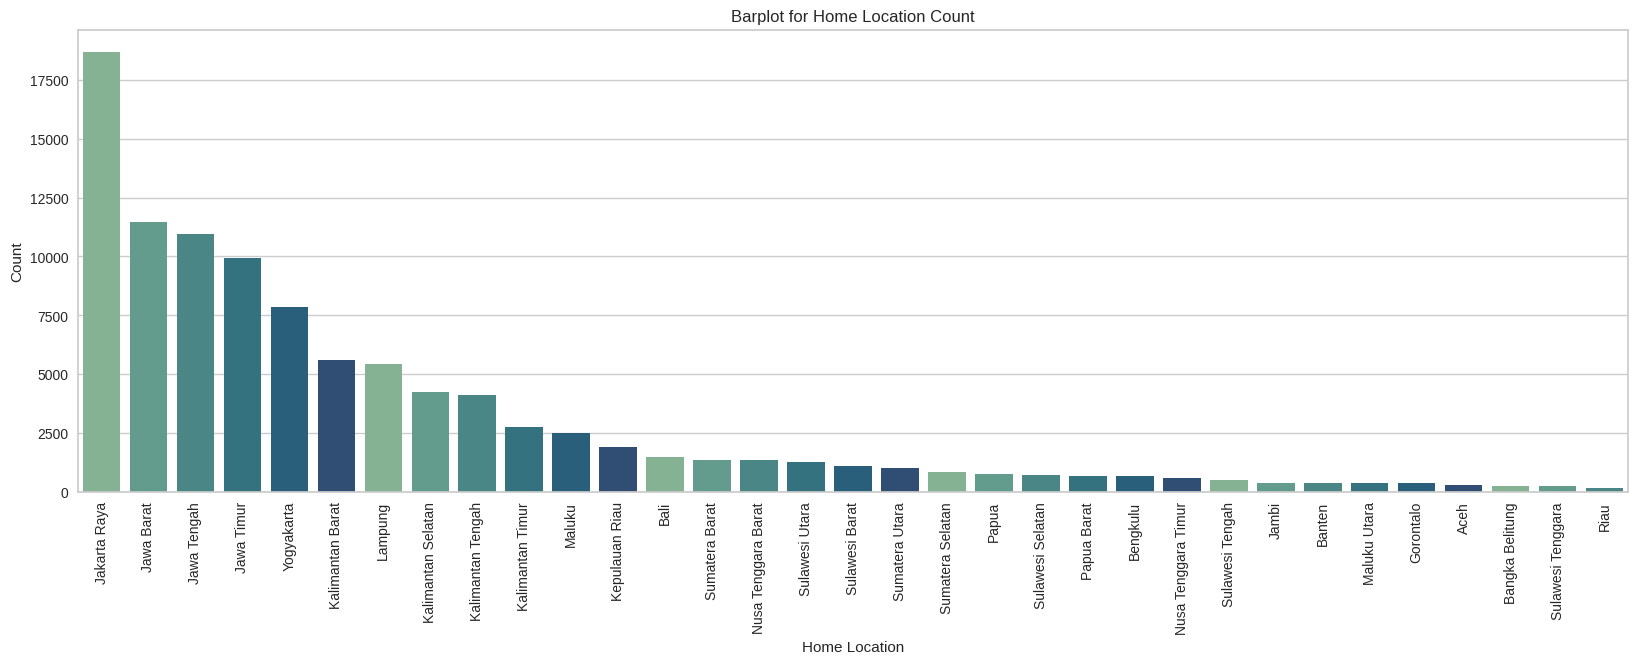

In [ ]:
plt.figure(figsize=(20, 6))

sns.barplot(x=result['home_location'], y=result['count'], palette=palette)

plt.xlabel('Home Location')
plt.ylabel('Count')
plt.title('Barplot for Home Location Count')
plt.xticks(rotation=90)
plt.show()

## Berdasarkan Produk

1. Banyak produk berdasarkan master kategori

masterCategory
Apparel           21366
Accessories       11244
Footwear           9197
Personal Care      2139
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64


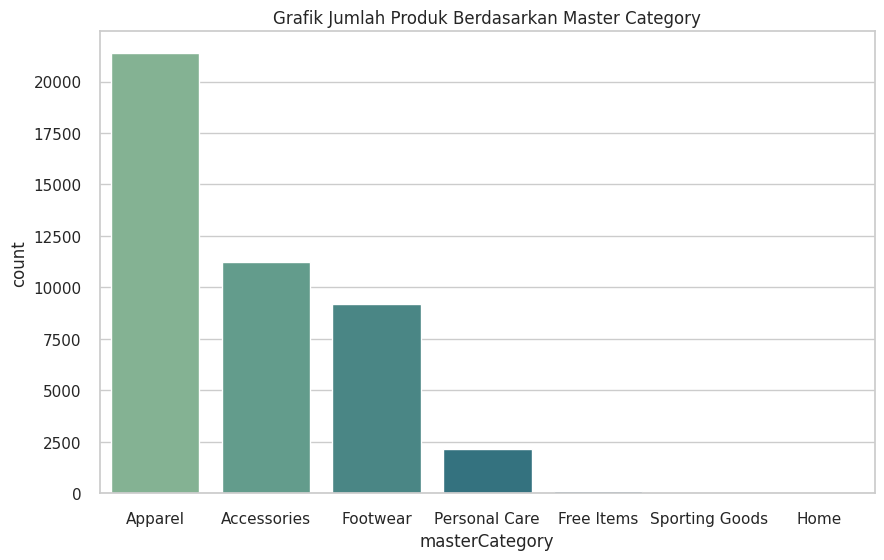

In [ ]:
result_master = df2.groupby(['masterCategory'])['masterCategory'].count().sort_values(ascending=False)
print(result_master)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='masterCategory', data=df2, palette=palette)
plt.title('Grafik Jumlah Produk Berdasarkan Master Category')
plt.show()

2. Banyak produk berdasarkan sub category

In [ ]:
result_sub = df2.groupby(['subCategory'])['subCategory'].count().sort_values(ascending=False)
print(result_sub)

subCategory
Topwear                     15387
Shoes                        7323
Bags                         3053
Bottomwear                   2686
Watches                      2542
Innerwear                    1806
Jewellery                    1079
Eyewear                      1073
Fragrance                    1001
Sandal                        961
Wallets                       925
Flip Flops                    913
Belts                         811
Socks                         698
Dress                         478
Loungewear and Nightwear      464
Saree                         427
Lips                          425
Headwear                      293
Nails                         278
Makeup                        263
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin                           53
Sk

3. Banyak produk berdasarkan base color

In [ ]:
result_base = df2.groupby(['baseColour'])['baseColour'].count().sort_values(ascending=False)
print(result_base)

baseColour
Black                9700
White                5497
Blue                 4907
Brown                3440
Grey                 2735
Red                  2434
Green                2103
Pink                 1824
Navy Blue            1784
Purple               1612
Silver               1089
Yellow                776
Beige                 745
Gold                  621
Maroon                577
Orange                523
Olive                 409
Multi                 394
Cream                 384
Steel                 315
Charcoal              228
Peach                 185
Off White             182
Skin                  163
Lavender              160
Grey Melange          146
Khaki                 139
Magenta               128
Teal                  119
Tan                   112
Mustard                97
Bronze                 89
Copper                 83
Turquoise Blue         69
Rust                   65
Burgundy               44
Metallic               41
Coffee Brown           29
M

4. Banyak produk berdasarkan season

season
Fall      11414
Spring     2712
Summer    21440
Winter     8511
Name: season, dtype: int64


<Axes: ylabel='season'>

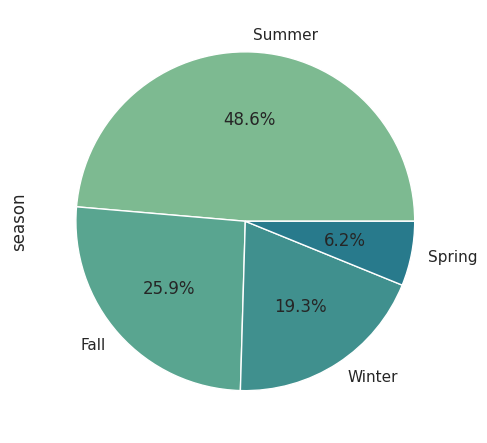

In [ ]:
print(df2.groupby(['season'])['season'].count())
df2['season'].value_counts().plot.pie(autopct='%1.1f%%', colors=palette)

5. Banyak produk berdasarkan tahun keluar

year
2007        2
2008        7
2009       20
2010      846
2011    13634
2012    16268
2013     1205
2014      236
2015     2775
2016     5998
2017     2649
2018      404
2019       33
Name: year, dtype: int64


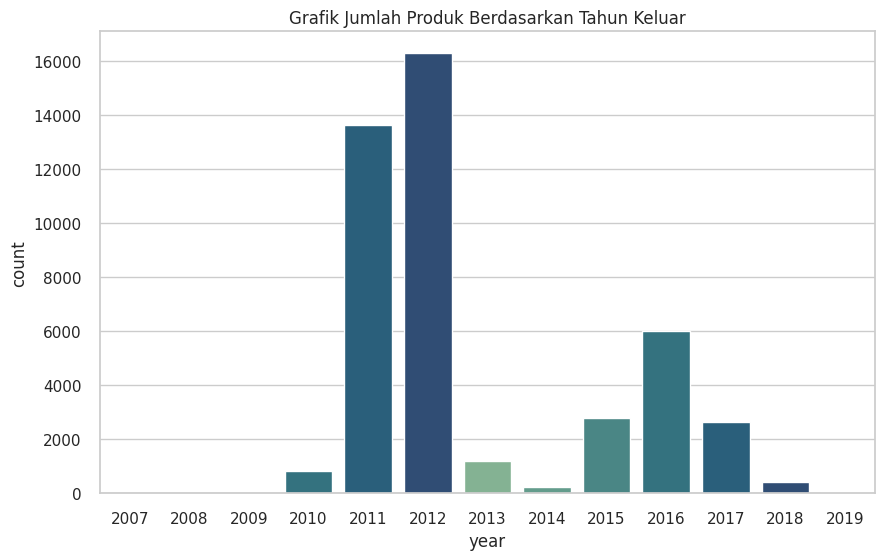

In [ ]:
result_year = df2.groupby(['year'])['year'].count()
print(result_year)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df2, palette=palette)
plt.title('Grafik Jumlah Produk Berdasarkan Tahun Keluar')
plt.show()

6. Banyak produk berdasarkan penggunaan

usage
Casual          34397
Sports           4004
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64


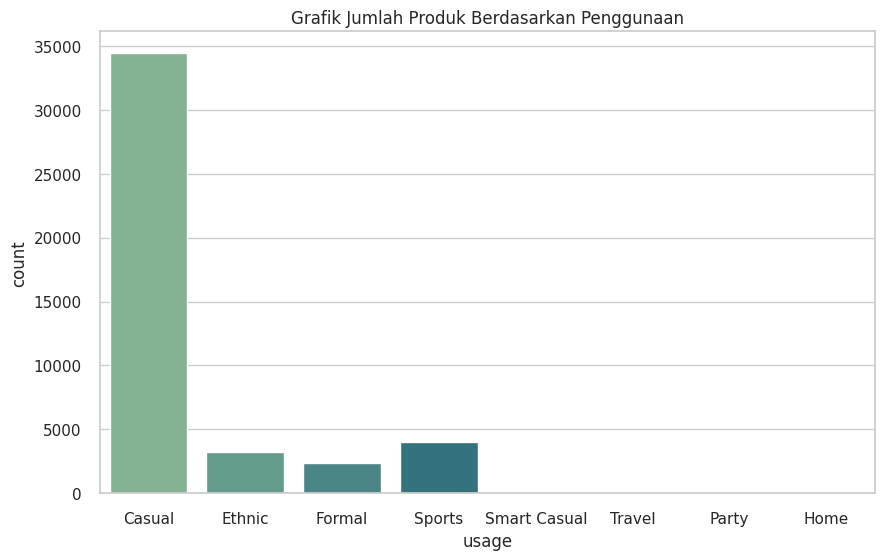

In [ ]:
result_usage = df2.groupby(['usage'])['usage'].count().sort_values(ascending=False)
print(result_usage)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='usage', data=df2, palette=palette)
plt.title('Grafik Jumlah Produk Berdasarkan Penggunaan')
plt.show()

7. Banyak produk berdasarkan gender

gender
Men       22109
Women     18357
Unisex     2126
Boys        830
Girls       655
Name: gender, dtype: int64


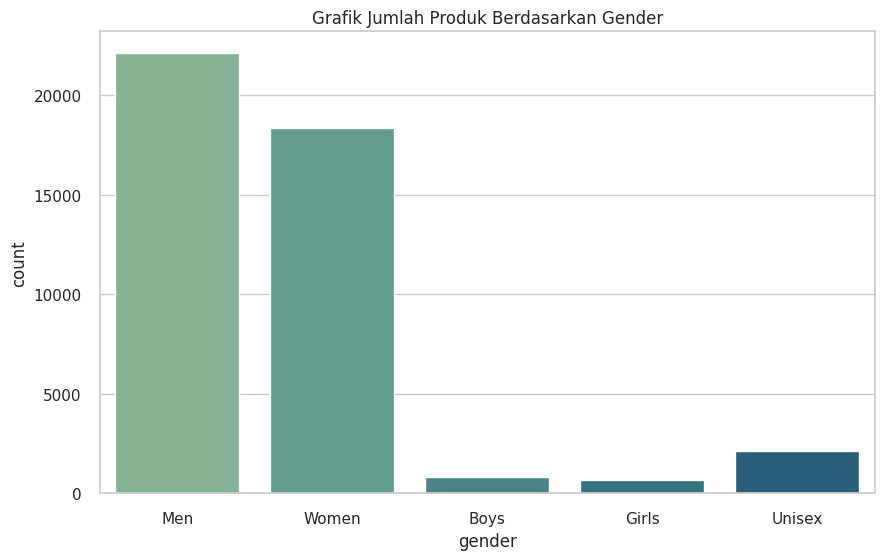

In [ ]:
result_gen = df2.groupby(['gender'])['gender'].count().sort_values(ascending=False)
print(result_gen)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df2, palette=palette)
plt.title('Grafik Jumlah Produk Berdasarkan Gender')
plt.show()

## Berdasarkan Transaksi

payment_method
Credit Card    299586
Gopay          171334
OVO            169066
Debit Card     137269
LinkAja         75329
Name: payment_method, dtype: int64


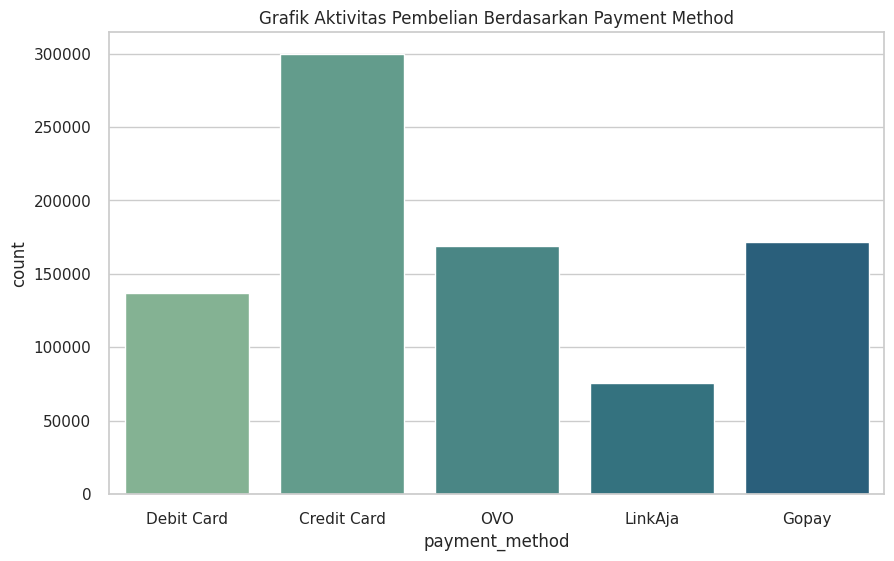

In [ ]:
result_payment = df3.groupby(['payment_method'])['payment_method'].count().sort_values(ascending=False)
print(result_payment)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_method', data=df3, palette=palette)
plt.title('Grafik Aktivitas Pembelian Berdasarkan Payment Method')
plt.show()

## Berdasarkan Click Stream

event_name
ADD_PROMO       326535
ADD_TO_CART    1937157
BOOKING         852582
CLICK          2498038
HOMEPAGE       2487126
ITEM_DETAIL    1290396
PROMO_PAGE      604931
SCROLL         1663571
SEARCH         1173266
Name: event_name, dtype: int64


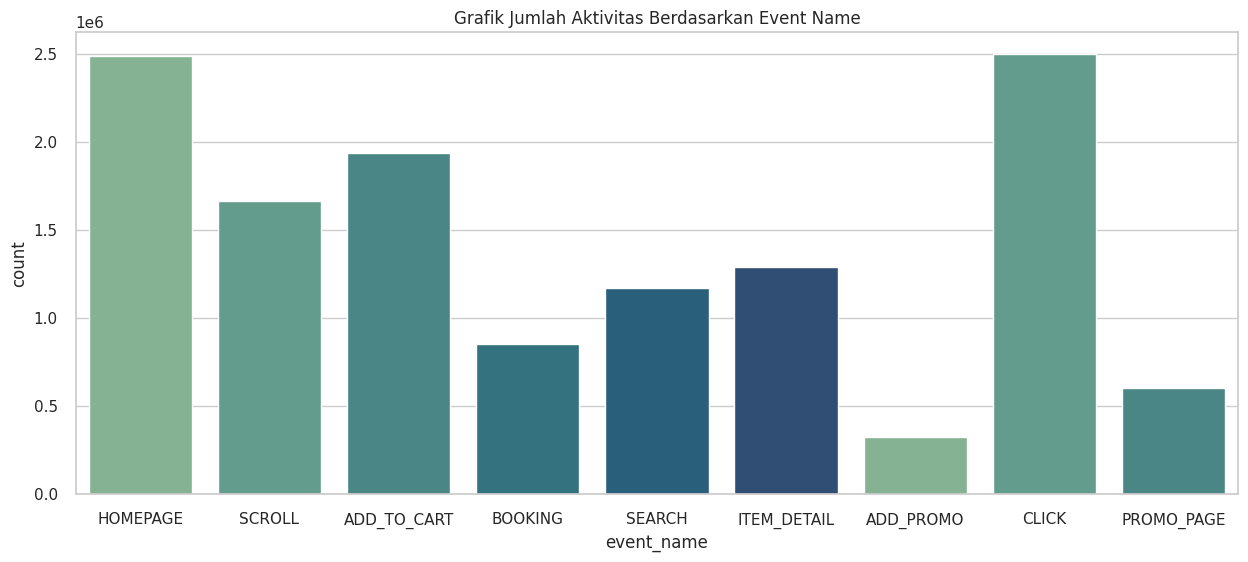

In [ ]:
print(df4.groupby(['event_name'])['event_name'].count())
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.countplot(x='event_name', data=df4, palette=palette)
plt.title('Grafik Jumlah Aktivitas Berdasarkan Event Name')
plt.show()

# Merging

In [ ]:
df1_merge = df1.copy()
df3_merge = df3.copy()

df3_merge2 = df3_merge[df3_merge["payment_status"] == "Success"]

In [ ]:
# df1 : Customer
df1_merge.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,28
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22


In [ ]:
# df3 : Transaction
df3_merge2.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,No Using Promo,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,No Using Promo,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,No Using Promo,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,No Using Promo,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


Merging customer dan transactions untuk melihat keseluruhan customer yang melakukan transaksi dan tidak

In [ ]:
merge1 = pd.merge(df1_merge[['customer_id','gender', 'age', 'device_type', 'home_location', 'first_join_date', 'home_location_lat', 'home_location_long']],
                  df3_merge2[['customer_id', 'booking_id', 'created_at', 'payment_method', 'promo_amount', 'promo_code', 'shipment_fee', 'shipment_date_limit', 'product_metadata', 'total_amount']],
                     on = 'customer_id', how = 'left')
merge1

,customer_id,gender,age,device_type,home_location,first_join_date,home_location_lat,home_location_long,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,product_metadata,total_amount
0,2870,F,26,iOS,Sumatera Barat,2019-07-21,-1.043345,101.360523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8193,F,28,Android,Jakarta Raya,2017-07-16,-6.212489,106.818850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23T12:53:12.916342Z,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26T05:14:04.908999Z,"[{'product_id': 18015, 'quantity': 1, 'item_pr...",844751.0
3,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31T13:34:59.916342Z,LinkAja,0.0,No Using Promo,10000.0,2020-09-04T05:49:01.977704Z,"[{'product_id': 12449, 'quantity': 1, 'item_pr...",391341.0
4,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,af568d06-c819-4ab4-a3e8-06857786ba10,2020-09-08T13:38:30.916342Z,LinkAja,0.0,No Using Promo,0.0,2020-09-14T11:26:20.142928Z,"[{'product_id': 25820, 'quantity': 1, 'item_pr...",154220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865717,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,6b4f439a-f515-44d3-9377-936514a3d116,2021-10-21T15:43:07.139547Z,Credit Card,0.0,No Using Promo,10000.0,2021-10-24T08:18:20.393551Z,"[{'product_id': 48507, 'quantity': 2, 'item_pr...",311938.0
865718,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,65367fff-1522-4c80-a0f7-1306676bd947,2022-01-23T19:01:48.139547Z,Credit Card,4532.0,WEEKENDSERU,10000.0,2022-01-26T01:41:11.712735Z,"[{'product_id': 42935, 'quantity': 1, 'item_pr...",110483.0
865719,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,7df40e00-5e2c-40c5-99f7-0e451ca82de4,2022-03-11T19:03:09.139547Z,Credit Card,0.0,No Using Promo,25000.0,2022-03-14T02:16:33.321801Z,"[{'product_id': 54808, 'quantity': 1, 'item_pr...",276290.0
865720,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,ae2b3e5b-0053-4671-ae18-f5a60b8a14dd,2022-04-27T20:00:55.139547Z,Credit Card,0.0,No Using Promo,10000.0,2022-04-29T06:40:10.012855Z,"[{'product_id': 7158, 'quantity': 1, 'item_pri...",258774.0


In [ ]:
merge1.dtypes

customer_id              int64
gender                  object
age                      int64
device_type             object
home_location           object
first_join_date         object
home_location_lat      float64
home_location_long     float64
booking_id              object
created_at              object
payment_method          object
promo_amount           float64
promo_code              object
shipment_fee           float64
shipment_date_limit     object
product_metadata        object
total_amount           float64
dtype: object

In [ ]:
merge1['created_at'] = pd.to_datetime(merge1['created_at'])
merge1['first_join_date'] = pd.to_datetime(merge1['first_join_date'])
merge1['shipment_date_limit'] = pd.to_datetime(merge1['shipment_date_limit'])

In [ ]:
merge1.dtypes

customer_id                          int64
gender                              object
age                                  int64
device_type                         object
home_location                       object
first_join_date             datetime64[ns]
home_location_lat                  float64
home_location_long                 float64
booking_id                          object
created_at             datetime64[ns, UTC]
payment_method                      object
promo_amount                       float64
promo_code                          object
shipment_fee                       float64
shipment_date_limit    datetime64[ns, UTC]
product_metadata                    object
total_amount                       float64
dtype: object

# JSON

## Merged Explode

Explode Data (Transactions : Product Metadata)

In [ ]:
explode1 = merge1.copy()
explode1['product_metadata'] = explode1['product_metadata'].fillna('{}')

explode1['product_metadata'] = explode1['product_metadata'].apply(ast.literal_eval)
explode2 = explode1.explode('product_metadata')
explode2 = pd.concat([explode2.drop(['product_metadata'], axis=1), explode2['product_metadata'].apply(pd.Series)], axis=1)

In [ ]:
explode2.head()

,customer_id,gender,age,device_type,home_location,first_join_date,home_location_lat,home_location_long,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,0,product_id,quantity,item_price
0,2870,F,26,iOS,Sumatera Barat,2019-07-21,-1.043345,101.360523,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,8193,F,28,Android,Jakarta Raya,2017-07-16,-6.212489,106.818850,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,NaN,18015.0,1.0,305982.0
2,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,NaN,2401.0,2.0,263311.0
3,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31 13:34:59.916342+00:00,LinkAja,0.0,No Using Promo,10000.0,2020-09-04 05:49:01.977704+00:00,391341.0,NaN,12449.0,1.0,381341.0


In [ ]:
print(explode2[0].isna().sum())
print(explode2.shape)

1250793
(1250793, 20)


In [ ]:
explode2 = explode2.drop(columns=[0])

In [ ]:
explode2

,customer_id,gender,age,device_type,home_location,first_join_date,home_location_lat,home_location_long,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price
0,2870,F,26,iOS,Sumatera Barat,2019-07-21,-1.043345,101.360523,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,8193,F,28,Android,Jakarta Raya,2017-07-16,-6.212489,106.818850,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,18015.0,1.0,305982.0
2,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,2401.0,2.0,263311.0
3,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31 13:34:59.916342+00:00,LinkAja,0.0,No Using Promo,10000.0,2020-09-04 05:49:01.977704+00:00,391341.0,12449.0,1.0,381341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865717,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,6b4f439a-f515-44d3-9377-936514a3d116,2021-10-21 15:43:07.139547+00:00,Credit Card,0.0,No Using Promo,10000.0,2021-10-24 08:18:20.393551+00:00,311938.0,48507.0,2.0,150969.0
865718,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,65367fff-1522-4c80-a0f7-1306676bd947,2022-01-23 19:01:48.139547+00:00,Credit Card,4532.0,WEEKENDSERU,10000.0,2022-01-26 01:41:11.712735+00:00,110483.0,42935.0,1.0,105015.0
865719,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,7df40e00-5e2c-40c5-99f7-0e451ca82de4,2022-03-11 19:03:09.139547+00:00,Credit Card,0.0,No Using Promo,25000.0,2022-03-14 02:16:33.321801+00:00,276290.0,54808.0,1.0,251290.0
865720,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,ae2b3e5b-0053-4671-ae18-f5a60b8a14dd,2022-04-27 20:00:55.139547+00:00,Credit Card,0.0,No Using Promo,10000.0,2022-04-29 06:40:10.012855+00:00,258774.0,7158.0,1.0,248774.0


In [ ]:
# explode2.to_csv('explode.csv', index=False)

In [ ]:
explode3 = explode2.copy()

# Cleaning

## Handling Duplicate After Exploding Data

In [ ]:
# check salah satu customer yang dalam 1 booking membeli lebih dari 1 item
a_check = explode3[(explode3["customer_id"] == 8)]
a_check

,customer_id,gender,age,device_type,home_location,first_join_date,home_location_lat,home_location_long,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price
822303,8,F,22,Android,Sulawesi Utara,2021-02-13,0.970013,124.816832,2111c10c-bb4b-4ecc-a6f7-f2b928414412,2021-02-13 09:47:39.656991+00:00,Credit Card,7699.0,WEEKENDSERU,0.0,2021-02-17 17:38:38.380300+00:00,223431.0,16943.0,1.0,231130.0
822304,8,F,22,Android,Sulawesi Utara,2021-02-13,0.970013,124.816832,a4f854f7-67ee-4368-98ba-d5c8c9eb8cdb,2021-04-30 12:01:35.656991+00:00,OVO,0.0,No Using Promo,5000.0,2021-05-02 09:46:09.058274+00:00,328328.0,18612.0,1.0,323328.0
822305,8,F,22,Android,Sulawesi Utara,2021-02-13,0.970013,124.816832,989af60b-3b81-4081-98d4-40871cd03331,2021-07-15 14:10:58.656991+00:00,Credit Card,0.0,No Using Promo,10000.0,2021-07-20 08:15:22.552302+00:00,860040.0,56723.0,1.0,285990.0
822305,8,F,22,Android,Sulawesi Utara,2021-02-13,0.970013,124.816832,989af60b-3b81-4081-98d4-40871cd03331,2021-07-15 14:10:58.656991+00:00,Credit Card,0.0,No Using Promo,10000.0,2021-07-20 08:15:22.552302+00:00,860040.0,56096.0,2.0,282025.0
822306,8,F,22,Android,Sulawesi Utara,2021-02-13,0.970013,124.816832,8c8a0b2a-a661-47d0-8b2f-c2a889ed3e8d,2021-09-29 16:39:41.656991+00:00,Credit Card,0.0,No Using Promo,10000.0,2021-10-04 06:08:24.696360+00:00,181676.0,37763.0,1.0,171676.0
822307,8,F,22,Android,Sulawesi Utara,2021-02-13,0.970013,124.816832,613480f4-f8c9-403a-8275-521a89c07363,2021-12-14 20:12:39.656991+00:00,Credit Card,0.0,No Using Promo,10000.0,2021-12-19 06:24:41.073605+00:00,783766.0,38590.0,3.0,257922.0
822308,8,F,22,Android,Sulawesi Utara,2021-02-13,0.970013,124.816832,b91aeac9-9d4e-4962-9ea5-a11f5d627097,2022-02-28 21:54:59.656991+00:00,Credit Card,0.0,No Using Promo,10000.0,2022-03-03 05:14:08.560369+00:00,344399.0,36712.0,1.0,334399.0
822309,8,F,22,Android,Sulawesi Utara,2021-02-13,0.970013,124.816832,36ba037a-490d-4e43-80e1-6e75b7cce8b8,2022-05-15 22:46:22.656991+00:00,Credit Card,0.0,No Using Promo,0.0,2022-05-17 03:26:51.518700+00:00,1176921.0,13513.0,9.0,130769.0


Setelah pengecekan, yang perlu diperhatikan adalah 3 kolom yang diexplode dari product_metadata : product_id, quantity, item_price. Selebihnya memiliki data yang sudah sesuai sehingga tidak diperlukan untuk dikontrol ulang.

In [ ]:
handle = explode3.copy()

# item_price harus dikalikan dengan quantity untuk mendapat actual price item
def cal_item_price(x):
    return x['item_price'] * x['quantity']

handle['item_price'] = handle.apply(cal_item_price, axis=1)

In [ ]:
handle.shape

(1250793, 19)

In [ ]:
handle.head()

,customer_id,gender,age,device_type,home_location,first_join_date,home_location_lat,home_location_long,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price
0,2870,F,26,iOS,Sumatera Barat,2019-07-21,-1.043345,101.360523,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,8193,F,28,Android,Jakarta Raya,2017-07-16,-6.212489,106.818850,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,18015.0,1.0,305982.0
2,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,2401.0,2.0,526622.0
3,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31 13:34:59.916342+00:00,LinkAja,0.0,No Using Promo,10000.0,2020-09-04 05:49:01.977704+00:00,391341.0,12449.0,1.0,381341.0


## Merge with Products

In [ ]:
df2_new = df2.rename(columns={
    'id' : 'product_id',
    'gender' : 'product_gender',
})

handle2 = handle.rename(columns={
    'home_location_lat' : 'latitude',
    'home_location_long' : 'longitude',
})

handle3 = pd.merge(handle2, df2_new[['product_id', 'masterCategory']], on='product_id', how='left')

In [ ]:
handle3

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,masterCategory
0,2870,F,26,iOS,Sumatera Barat,2019-07-21,-1.043345,101.360523,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,8193,F,28,Android,Jakarta Raya,2017-07-16,-6.212489,106.818850,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,18015.0,1.0,305982.0,Accessories
3,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,2401.0,2.0,526622.0,Apparel
4,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31 13:34:59.916342+00:00,LinkAja,0.0,No Using Promo,10000.0,2020-09-04 05:49:01.977704+00:00,391341.0,12449.0,1.0,381341.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250788,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,6b4f439a-f515-44d3-9377-936514a3d116,2021-10-21 15:43:07.139547+00:00,Credit Card,0.0,No Using Promo,10000.0,2021-10-24 08:18:20.393551+00:00,311938.0,48507.0,2.0,301938.0,Apparel
1250789,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,65367fff-1522-4c80-a0f7-1306676bd947,2022-01-23 19:01:48.139547+00:00,Credit Card,4532.0,WEEKENDSERU,10000.0,2022-01-26 01:41:11.712735+00:00,110483.0,42935.0,1.0,105015.0,Accessories
1250790,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,7df40e00-5e2c-40c5-99f7-0e451ca82de4,2022-03-11 19:03:09.139547+00:00,Credit Card,0.0,No Using Promo,25000.0,2022-03-14 02:16:33.321801+00:00,276290.0,54808.0,1.0,251290.0,Accessories
1250791,40573,F,34,Android,Banten,2021-07-17,-6.524369,106.283232,ae2b3e5b-0053-4671-ae18-f5a60b8a14dd,2022-04-27 20:00:55.139547+00:00,Credit Card,0.0,No Using Promo,10000.0,2022-04-29 06:40:10.012855+00:00,258774.0,7158.0,1.0,248774.0,Apparel


In [ ]:
handle4 = pd.concat([handle3, pd.get_dummies(handle3['masterCategory'], prefix='category', prefix_sep='_')], axis=1)

In [ ]:
handle4.head()

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,masterCategory,category_Accessories,category_Apparel,category_Footwear,category_Free Items,category_Home,category_Personal Care,category_Sporting Goods
0,2870,F,26,iOS,Sumatera Barat,2019-07-21,-1.043345,101.360523,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,8193,F,28,Android,Jakarta Raya,2017-07-16,-6.212489,106.818850,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,18015.0,1.0,305982.0,Accessories,1,0,0,0,0,0,0
3,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,2401.0,2.0,526622.0,Apparel,0,1,0,0,0,0,0
4,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31 13:34:59.916342+00:00,LinkAja,0.0,No Using Promo,10000.0,2020-09-04 05:49:01.977704+00:00,391341.0,12449.0,1.0,381341.0,NaN,0,0,0,0,0,0,0


In [ ]:
handle5 = handle4.rename(columns={
    'category_Accessories' : 'mastercat_accessories',
    'category_Apparel' : 'mastercat_apparel',
    'category_Footwear' : 'mastercat_footwear',
    'category_Free Items' : 'mastercat_free_items',
    'category_Home' : 'mastercat_home',
    'category_Personal Care' : 'mastercat_personal_care',
    'category_Sporting Goods' : 'mastercat_sporting_goods',
})

In [ ]:
handle5.head()

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,masterCategory,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods
0,2870,F,26,iOS,Sumatera Barat,2019-07-21,-1.043345,101.360523,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,8193,F,28,Android,Jakarta Raya,2017-07-16,-6.212489,106.818850,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,18015.0,1.0,305982.0,Accessories,1,0,0,0,0,0,0
3,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,2020-08-23 12:53:12.916342+00:00,LinkAja,2853.0,WEEKENDSERU,15000.0,2020-08-26 05:14:04.908999+00:00,844751.0,2401.0,2.0,526622.0,Apparel,0,1,0,0,0,0,0
4,7279,M,33,iOS,Nusa Tenggara Barat,2020-08-23,-8.631607,116.428436,eed52035-1f80-422c-b0ac-a1c814e77bcf,2020-08-31 13:34:59.916342+00:00,LinkAja,0.0,No Using Promo,10000.0,2020-09-04 05:49:01.977704+00:00,391341.0,12449.0,1.0,381341.0,NaN,0,0,0,0,0,0,0


In [ ]:
# Agregasi data
agg_data = {
    'product_id' : 'count',
    'quantity' : 'sum',
    'item_price' : 'sum',
    'mastercat_accessories' : 'sum',
    'mastercat_apparel' : 'sum',
    'mastercat_footwear' : 'sum',
    'mastercat_free_items' : 'sum',
    'mastercat_home' : 'sum',
    'mastercat_personal_care' : 'sum',
    'mastercat_sporting_goods' : 'sum',
}

handle6 = handle5.groupby(['customer_id', 'gender', 'age', 'device_type', 'home_location', 'first_join_date',
                         'latitude', 'longitude', 'booking_id', 'created_at', 'payment_method', 'promo_amount',
                         'promo_code', 'shipment_fee', 'shipment_date_limit', 'total_amount'], as_index=False).agg(agg_data)

In [ ]:
handle6.shape

(815964, 26)

In [ ]:
duplicates = handle6[handle6.duplicated('booking_id', keep=False)]

print("Duplicate Booking Id:")
print(duplicates)

Duplicate Booking Id:
Empty DataFrame
Columns: [customer_id, gender, age, device_type, home_location, first_join_date, latitude, longitude, booking_id, created_at, payment_method, promo_amount, promo_code, shipment_fee, shipment_date_limit, total_amount, product_id, quantity, item_price, mastercat_accessories, mastercat_apparel, mastercat_footwear, mastercat_free_items, mastercat_home, mastercat_personal_care, mastercat_sporting_goods]
Index: []


Shape sudah berkurang serta tidak ada duplicate data pada booking_id

In [ ]:
handle6 = handle6.rename(columns={
    'product_id' : 'total_product'
})

In [ ]:
handle6.head()

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods
0,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,LinkAja,3791.0,WEEKENDSERU,0.0,2020-06-05 21:48:15.962173+00:00,174717.0,1,1.0,178508.0,0,1,0,0,0,0,0
1,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,0fb5a9e6-f306-4c37-b7f0-992bc78064a7,2022-06-26 15:41:52.844494+00:00,LinkAja,4240.0,WEEKENDMANTAP,0.0,2022-06-28 03:28:42.264228+00:00,189939.0,1,1.0,194179.0,1,0,0,0,0,0,0
2,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1229bd35-7747-447a-a60b-02860bf7da7e,2021-07-25 10:24:57.844494+00:00,Credit Card,0.0,No Using Promo,0.0,2021-07-27 10:50:38.770620+00:00,287523.0,1,1.0,287523.0,0,1,0,0,0,0,0
3,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,163e447d-f2c2-4fac-b8a1-015eb01afd41,2020-06-28 06:31:43.844494+00:00,Credit Card,1472.0,WEEKENDMANTAP,0.0,2020-07-01 16:23:06.952038+00:00,359032.0,1,1.0,360504.0,0,0,1,0,0,0,0
4,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,182774df-3cde-46cf-b302-4d93e0d94288,2021-01-10 07:56:16.844494+00:00,Credit Card,4746.0,WEEKENDMANTAP,5000.0,2021-01-15 00:39:58.891443+00:00,205436.0,1,1.0,205182.0,0,1,0,0,0,0,0


In [ ]:
null_handle = handle5[handle5['booking_id'].isna()].drop(columns=['product_id', 'masterCategory'])

mastercategory_columns = ['mastercat_accessories', 'mastercat_apparel', 'mastercat_footwear', 'mastercat_free_items', 'mastercat_home', 'mastercat_personal_care', 'mastercat_sporting_goods']
for col in mastercategory_columns:
    null_handle[col] = null_handle[col] * null_handle['quantity']

null_handle

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods
0,2870,F,26,iOS,Sumatera Barat,2019-07-21,-1.043345,101.360523,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8193,F,28,Android,Jakarta Raya,2017-07-16,-6.212489,106.818850,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,88813,M,31,iOS,Kalimantan Timur,2021-10-03,1.299332,115.774934,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,5440,F,33,Android,Jakarta Raya,2021-05-30,-6.277891,106.786538,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,90319,M,32,Android,Kepulauan Riau,2019-12-14,0.869352,103.873668,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250043,56781,M,20,Android,Jambi,2022-01-02,-1.854536,102.071355,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250081,20595,F,19,Android,Bali,2021-08-01,-8.566950,115.363376,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250416,59948,F,19,Android,Maluku,2020-11-27,-2.930867,129.739377,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250527,64260,F,25,Android,Jawa Timur,2021-06-29,-6.941088,112.588262,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
handle7 = pd.concat([handle6, null_handle], ignore_index=True)
handle7

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods
0,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,LinkAja,3791.0,WEEKENDSERU,0.0,2020-06-05 21:48:15.962173+00:00,174717.0,1.0,1.0,178508.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,0fb5a9e6-f306-4c37-b7f0-992bc78064a7,2022-06-26 15:41:52.844494+00:00,LinkAja,4240.0,WEEKENDMANTAP,0.0,2022-06-28 03:28:42.264228+00:00,189939.0,1.0,1.0,194179.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1229bd35-7747-447a-a60b-02860bf7da7e,2021-07-25 10:24:57.844494+00:00,Credit Card,0.0,No Using Promo,0.0,2021-07-27 10:50:38.770620+00:00,287523.0,1.0,1.0,287523.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,163e447d-f2c2-4fac-b8a1-015eb01afd41,2020-06-28 06:31:43.844494+00:00,Credit Card,1472.0,WEEKENDMANTAP,0.0,2020-07-01 16:23:06.952038+00:00,359032.0,1.0,1.0,360504.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,182774df-3cde-46cf-b302-4d93e0d94288,2021-01-10 07:56:16.844494+00:00,Credit Card,4746.0,WEEKENDMANTAP,5000.0,2021-01-15 00:39:58.891443+00:00,205436.0,1.0,1.0,205182.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865717,56781,M,20,Android,Jambi,2022-01-02,-1.854536,102.071355,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865718,20595,F,19,Android,Bali,2021-08-01,-8.566950,115.363376,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865719,59948,F,19,Android,Maluku,2020-11-27,-2.930867,129.739377,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865720,64260,F,25,Android,Jawa Timur,2021-06-29,-6.941088,112.588262,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
handle7 = handle7.sort_values(by='customer_id').reset_index(drop=True)
handle7

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods
0,1,F,23,iOS,Kalimantan Tengah,2016-11-27,-2.728020,114.215521,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,F,31,Android,Jawa Barat,2021-12-25,-6.010465,107.292582,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,LinkAja,3791.0,WEEKENDSERU,0.0,2020-06-05 21:48:15.962173+00:00,174717.0,1.0,1.0,178508.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,856b0c3d-b076-406b-be11-3dfee762e9be,2018-08-25 18:54:03.844494+00:00,Credit Card,8073.0,WEEKENDMANTAP,0.0,2018-08-27 05:08:15.817545+00:00,826597.0,1.0,5.0,834670.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,858ee537-feff-4ea8-b39e-b0c5dee3a7db,2022-05-01 14:17:11.844494+00:00,Credit Card,8051.0,WEEKENDSERU,10000.0,2022-05-04 01:28:05.416704+00:00,293713.0,1.0,1.0,291764.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865717,99998,F,8,Android,Lampung,2018-07-01,-4.092411,105.179376,0d102b41-78e1-4c46-81d2-eff6f725fc2a,2020-07-15 19:24:07.703960+00:00,Credit Card,0.0,No Using Promo,10000.0,2020-07-20 14:54:54.909840+00:00,534337.0,2.0,2.0,524337.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
865718,99998,F,8,Android,Lampung,2018-07-01,-4.092411,105.179376,06fbe4b4-e98b-403d-a05d-396ae9903e2a,2022-01-25 00:54:09.703960+00:00,Credit Card,1954.0,BUYMORE,10000.0,2022-01-26 18:07:50.318967+00:00,4222436.0,16.0,22.0,4214390.0,5.0,8.0,3.0,0.0,0.0,0.0,0.0
865719,99998,F,8,Android,Lampung,2018-07-01,-4.092411,105.179376,0361a084-9362-4a93-b940-d59e7ce91970,2021-07-22 22:33:46.703960+00:00,Debit Card,0.0,No Using Promo,0.0,2021-07-25 02:09:59.898911+00:00,485330.0,1.0,2.0,485330.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
865720,99999,M,12,Android,Lampung,2016-10-12,-4.876648,104.598266,9e654f59-8c2b-4538-a2b9-6a7f1b0ec8b3,2016-10-12 19:22:21.166237+00:00,Gopay,0.0,No Using Promo,10000.0,2016-10-14 13:45:07.123325+00:00,196111.0,1.0,1.0,186111.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering

## Group Age

In [ ]:
final1 = handle7.copy()

In [ ]:
df1['age'].describe()

count    100000.000000
mean         26.145680
std           7.265286
min           6.000000
25%          21.000000
50%          25.000000
75%          31.000000
max          68.000000
Name: age, dtype: float64

In [ ]:
cust_grage = df1[['customer_id', 'age']].copy()

def group_age(x):
    if x <= 17:
        return 'Child'
    elif x <= 25:
        return 'Young Adult'
    elif x <= 32:
        return 'Adult'
    else:
        return 'Old'

cust_grage['age_group'] = cust_grage['age'].apply(lambda x: group_age(x))

In [ ]:
cust_grage.head()

,customer_id,age,age_group
0,2870,26,Adult
1,8193,28,Adult
2,7279,33,Old
3,88813,31,Adult
4,82542,22,Young Adult


In [ ]:
cust_grage['age_group'].value_counts()

Young Adult    39549
Adult          31576
Old            18411
Child          10464
Name: age_group, dtype: int64

In [ ]:
final2 = final1.merge(cust_grage[['customer_id','age_group']], on='customer_id', how='left')

In [ ]:
final2.head()

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,age_group
0,1,F,23,iOS,Kalimantan Tengah,2016-11-27,-2.728020,114.215521,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Young Adult
1,2,F,31,Android,Jawa Barat,2021-12-25,-6.010465,107.292582,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult
2,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,LinkAja,3791.0,WEEKENDSERU,0.0,2020-06-05 21:48:15.962173+00:00,174717.0,1.0,1.0,178508.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Old
3,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,856b0c3d-b076-406b-be11-3dfee762e9be,2018-08-25 18:54:03.844494+00:00,Credit Card,8073.0,WEEKENDMANTAP,0.0,2018-08-27 05:08:15.817545+00:00,826597.0,1.0,5.0,834670.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Old
4,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,858ee537-feff-4ea8-b39e-b0c5dee3a7db,2022-05-01 14:17:11.844494+00:00,Credit Card,8051.0,WEEKENDSERU,10000.0,2022-05-04 01:28:05.416704+00:00,293713.0,1.0,1.0,291764.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Old


## Payment Method

In [ ]:
tran_method = df3_merge2[['created_at','customer_id','payment_method']].copy()
tran_method['created_at'] = pd.to_datetime(tran_method['created_at'])

In [ ]:
tran_method2 = pd.concat([tran_method, pd.get_dummies(tran_method['payment_method'], prefix='', prefix_sep='')], axis=1)
tran_method2 = tran_method2.drop(columns=['payment_method'])

In [ ]:
final3 = final2.merge(tran_method2, on=['customer_id','created_at'], how='left')
final3 = final3.rename(columns={'Credit Card':'credit_card', 'Debit Card':'debit_card', 'Gopay':'gopay', 'LinkAja':'link_aja', 'OVO':'ovo'})
final3.head()

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,age_group,credit_card,debit_card,gopay,link_aja,ovo
0,1,F,23,iOS,Kalimantan Tengah,2016-11-27,-2.728020,114.215521,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Young Adult,NaN,NaN,NaN,NaN,NaN
1,2,F,31,Android,Jawa Barat,2021-12-25,-6.010465,107.292582,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult,NaN,NaN,NaN,NaN,NaN
2,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,LinkAja,3791.0,WEEKENDSERU,0.0,2020-06-05 21:48:15.962173+00:00,174717.0,1.0,1.0,178508.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Old,0.0,0.0,0.0,1.0,0.0
3,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,856b0c3d-b076-406b-be11-3dfee762e9be,2018-08-25 18:54:03.844494+00:00,Credit Card,8073.0,WEEKENDMANTAP,0.0,2018-08-27 05:08:15.817545+00:00,826597.0,1.0,5.0,834670.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Old,1.0,0.0,0.0,0.0,0.0
4,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,858ee537-feff-4ea8-b39e-b0c5dee3a7db,2022-05-01 14:17:11.844494+00:00,Credit Card,8051.0,WEEKENDSERU,10000.0,2022-05-04 01:28:05.416704+00:00,293713.0,1.0,1.0,291764.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Old,1.0,0.0,0.0,0.0,0.0


## Promo Used

In [ ]:
final4 = final3.copy()

In [ ]:
def promo_code(x):
    if pd.isnull(x):
        return np.nan
    elif x == 'No Using Promo':
        return 0
    else:
        return 1

final4['promo_used'] = final4['promo_code'].apply(promo_code)

In [ ]:
final4.head()

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,age_group,credit_card,debit_card,gopay,link_aja,ovo,promo_used
0,1,F,23,iOS,Kalimantan Tengah,2016-11-27,-2.728020,114.215521,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Young Adult,NaN,NaN,NaN,NaN,NaN,NaN
1,2,F,31,Android,Jawa Barat,2021-12-25,-6.010465,107.292582,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult,NaN,NaN,NaN,NaN,NaN,NaN
2,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,LinkAja,3791.0,WEEKENDSERU,0.0,2020-06-05 21:48:15.962173+00:00,174717.0,1.0,1.0,178508.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Old,0.0,0.0,0.0,1.0,0.0,1.0
3,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,856b0c3d-b076-406b-be11-3dfee762e9be,2018-08-25 18:54:03.844494+00:00,Credit Card,8073.0,WEEKENDMANTAP,0.0,2018-08-27 05:08:15.817545+00:00,826597.0,1.0,5.0,834670.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Old,1.0,0.0,0.0,0.0,0.0,1.0
4,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,858ee537-feff-4ea8-b39e-b0c5dee3a7db,2022-05-01 14:17:11.844494+00:00,Credit Card,8051.0,WEEKENDSERU,10000.0,2022-05-04 01:28:05.416704+00:00,293713.0,1.0,1.0,291764.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Old,1.0,0.0,0.0,0.0,0.0,1.0


## Shipment Time Limit (Days)

In [ ]:
final5 = final4.copy()

In [ ]:
final5['date_limit'] = (final5['shipment_date_limit'] - final5['created_at']).dt.days

In [ ]:
final5.head()

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,age_group,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit
0,1,F,23,iOS,Kalimantan Tengah,2016-11-27,-2.728020,114.215521,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Young Adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,F,31,Android,Jawa Barat,2021-12-25,-6.010465,107.292582,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,LinkAja,3791.0,WEEKENDSERU,0.0,2020-06-05 21:48:15.962173+00:00,174717.0,1.0,1.0,178508.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Old,0.0,0.0,0.0,1.0,0.0,1.0,5.0
3,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,856b0c3d-b076-406b-be11-3dfee762e9be,2018-08-25 18:54:03.844494+00:00,Credit Card,8073.0,WEEKENDMANTAP,0.0,2018-08-27 05:08:15.817545+00:00,826597.0,1.0,5.0,834670.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Old,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,858ee537-feff-4ea8-b39e-b0c5dee3a7db,2022-05-01 14:17:11.844494+00:00,Credit Card,8051.0,WEEKENDSERU,10000.0,2022-05-04 01:28:05.416704+00:00,293713.0,1.0,1.0,291764.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Old,1.0,0.0,0.0,0.0,0.0,1.0,2.0


## Partition Date

In [ ]:
final6 = final5.copy()

In [ ]:
final6['partition_date'] = final6['created_at'].dt.to_period('M')
final6['partition_date'] = final6['partition_date'].dt.to_timestamp()

<ipython-input-242-ed6d53e8bf49>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  final6['partition_date'] = final6['created_at'].dt.to_period('M')


In [ ]:
final6.head()

,customer_id,gender,age,device_type,home_location,first_join_date,latitude,longitude,booking_id,created_at,payment_method,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,age_group,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,partition_date
0,1,F,23,iOS,Kalimantan Tengah,2016-11-27,-2.728020,114.215521,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Young Adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2,F,31,Android,Jawa Barat,2021-12-25,-6.010465,107.292582,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,0b3f17a4-f733-4eac-b9e9-37c039746e95,2020-05-31 05:45:52.844494+00:00,LinkAja,3791.0,WEEKENDSERU,0.0,2020-06-05 21:48:15.962173+00:00,174717.0,1.0,1.0,178508.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Old,0.0,0.0,0.0,1.0,0.0,1.0,5.0,2020-05-01
3,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,856b0c3d-b076-406b-be11-3dfee762e9be,2018-08-25 18:54:03.844494+00:00,Credit Card,8073.0,WEEKENDMANTAP,0.0,2018-08-27 05:08:15.817545+00:00,826597.0,1.0,5.0,834670.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Old,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2018-08-01
4,3,M,36,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,858ee537-feff-4ea8-b39e-b0c5dee3a7db,2022-05-01 14:17:11.844494+00:00,Credit Card,8051.0,WEEKENDSERU,10000.0,2022-05-04 01:28:05.416704+00:00,293713.0,1.0,1.0,291764.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Old,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2022-05-01


In [ ]:
# Agregasi data
agg_data2 = {
    'booking_id' : 'count',
    'promo_amount' : 'sum',
    'shipment_fee' : 'sum',
    'total_amount' : 'sum',
    'total_product' : 'sum',
    'quantity' : 'sum',
    'item_price' : 'sum',
    'mastercat_accessories' : 'sum',
    'mastercat_apparel' : 'sum',
    'mastercat_footwear' : 'sum',
    'mastercat_free_items' : 'sum',
    'mastercat_home' : 'sum',
    'mastercat_personal_care' : 'sum',
    'mastercat_sporting_goods' : 'sum',
    'credit_card' : 'sum',
    'debit_card' : 'sum',
    'gopay' : 'sum',
    'link_aja' : 'sum',
    'ovo' : 'sum',
    'promo_used' : 'sum',
    'date_limit' : 'mean'
}

final7 = final6.groupby(['customer_id', 'partition_date', 'gender', 'age', 'age_group', 'device_type',
                         'home_location', 'first_join_date', 'latitude', 'longitude'], as_index=False).agg(agg_data2)

In [ ]:
final7

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,booking_id,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit
0,3,2018-08-01,M,36,Old,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1,8073.0,0.0,826597.0,1.0,5.0,834670.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,3,2018-09-01,M,36,Old,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1,0.0,10000.0,163784.0,1.0,1.0,153784.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
2,3,2018-10-01,M,36,Old,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1,8828.0,10000.0,124932.0,1.0,1.0,123760.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0
3,3,2018-11-01,M,36,Old,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1,3415.0,0.0,247902.0,1.0,1.0,251317.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
4,3,2018-12-01,M,36,Old,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1,2645.0,10000.0,181237.0,1.0,1.0,173882.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565536,99998,2020-07-01,F,8,Child,Android,Lampung,2018-07-01,-4.092411,105.179376,1,0.0,10000.0,534337.0,2.0,2.0,524337.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
565537,99998,2021-01-01,F,8,Child,Android,Lampung,2018-07-01,-4.092411,105.179376,1,8569.0,10000.0,366178.0,1.0,1.0,364747.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
565538,99998,2021-07-01,F,8,Child,Android,Lampung,2018-07-01,-4.092411,105.179376,1,0.0,0.0,485330.0,1.0,2.0,485330.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
565539,99998,2022-01-01,F,8,Child,Android,Lampung,2018-07-01,-4.092411,105.179376,1,1954.0,10000.0,4222436.0,16.0,22.0,4214390.0,5.0,8.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
partition_check = final7[((final7['customer_id'] == 69740) & (final7['partition_date'] == '2019-01'))]
partition_check

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,booking_id,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit
394951,69740,2019-01-01,F,21,Young Adult,Android,Jawa Timur,2017-02-13,-8.246706,112.510759,8,18083.0,65000.0,2929277.0,8.0,10.0,2882360.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1.0,3.0,2.875


In [ ]:
print('>> Num of Missing Value')
col_msval = final7.isnull().sum()[final7.isnull().sum() > 0]
print(col_msval)

>> Num of Missing Value
Series([], dtype: int64)


In [ ]:
print(">> Duplicate Partition Date")
duplicates1 = final7[final7.duplicated('partition_date', keep=False)]
print(duplicates)

>> Duplicate Partition Date
Empty DataFrame
Columns: [customer_id, gender, age, device_type, home_location, first_join_date, latitude, longitude, booking_id, created_at, payment_method, promo_amount, promo_code, shipment_fee, shipment_date_limit, total_amount, product_id, quantity, item_price, mastercat_accessories, mastercat_apparel, mastercat_footwear, mastercat_free_items, mastercat_home, mastercat_personal_care, mastercat_sporting_goods]
Index: []


In [ ]:
final7 = final7.rename(columns={
    'booking_id' : 'total_booking'
})

In [ ]:
null_final6 = final6[final6['partition_date'].isna()]
null_final6 = null_final6[['customer_id', 'gender', 'age', 'age_group', 'device_type', 'home_location', 'first_join_date', 'latitude', 'longitude']]
null_final6

,customer_id,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude
0,1,F,23,Young Adult,iOS,Kalimantan Tengah,2016-11-27,-2.728020,114.215521
1,2,F,31,Adult,Android,Jawa Barat,2021-12-25,-6.010465,107.292582
51,4,F,27,Adult,Android,Kalimantan Barat,2021-03-22,0.349326,109.061486
52,5,M,28,Adult,iOS,Jakarta Raya,2021-12-18,-6.138983,106.873723
53,6,F,26,Adult,iOS,Lampung,2022-03-27,-4.932486,103.969237
...,...,...,...,...,...,...,...,...,...
865634,99990,F,24,Young Adult,Android,Sumatera Barat,2021-09-18,-1.558585,101.352504
865649,99993,M,24,Young Adult,Android,Kalimantan Barat,2020-05-27,-2.672596,110.968420
865650,99994,F,21,Young Adult,Android,Jakarta Raya,2021-02-10,-6.165793,106.961989
865710,99996,M,18,Young Adult,Android,Sulawesi Selatan,2022-04-13,-3.699470,120.047102


In [ ]:
final8 = pd.concat([final7, null_final6], ignore_index=True)
final8

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit
0,3,2018-08-01,M,36,Old,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1.0,8073.0,0.0,826597.0,1.0,5.0,834670.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,3,2018-09-01,M,36,Old,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1.0,0.0,10000.0,163784.0,1.0,1.0,153784.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
2,3,2018-10-01,M,36,Old,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1.0,8828.0,10000.0,124932.0,1.0,1.0,123760.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0
3,3,2018-11-01,M,36,Old,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1.0,3415.0,0.0,247902.0,1.0,1.0,251317.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
4,3,2018-12-01,M,36,Old,Android,Jakarta Raya,2018-08-25,-6.151858,106.945839,1.0,2645.0,10000.0,181237.0,1.0,1.0,173882.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615294,99990,NaT,F,24,Young Adult,Android,Sumatera Barat,2021-09-18,-1.558585,101.352504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615295,99993,NaT,M,24,Young Adult,Android,Kalimantan Barat,2020-05-27,-2.672596,110.968420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615296,99994,NaT,F,21,Young Adult,Android,Jakarta Raya,2021-02-10,-6.165793,106.961989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615297,99996,NaT,M,18,Young Adult,Android,Sulawesi Selatan,2022-04-13,-3.699470,120.047102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
customer_conditions = final8[(final8['partition_date'].isnull()) & (final8['total_booking'].notnull())]
customer_conditions

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit


In [ ]:
final8 = final8.sort_values(by=['partition_date', 'customer_id'])
final8 = final8.reset_index(drop=True)
final8

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1,221,2016-07-01,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,837,2016-07-01,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,933,2016-07-01,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0
4,1022,2016-07-01,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615294,99990,NaT,F,24,Young Adult,Android,Sumatera Barat,2021-09-18,-1.558585,101.352504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615295,99993,NaT,M,24,Young Adult,Android,Kalimantan Barat,2020-05-27,-2.672596,110.968420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615296,99994,NaT,F,21,Young Adult,Android,Jakarta Raya,2021-02-10,-6.165793,106.961989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615297,99996,NaT,M,18,Young Adult,Android,Sulawesi Selatan,2022-04-13,-3.699470,120.047102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Shipment Fee Category

In [ ]:
final8['shipment_fee'].describe()

count    565541.000000
mean      13262.637015
std       14841.707843
min           0.000000
25%        5000.000000
50%       10000.000000
75%       15000.000000
max      665000.000000
Name: shipment_fee, dtype: float64

In [ ]:
final9 = final8.copy()

In [ ]:
def func(x):
    if np.isnan(x):
        return np.nan
    elif x <= 5000:
        return 'Low Shipment Fee'
    elif x <= 10000:
        return 'Medium Low Shipment Fee'
    elif x <= 15000:
        return 'Medium High Shipment Fee'
    else:
        return 'High Shipment Fee'

final9['cat_shipments_fee'] = final9['shipment_fee'].apply(func)

In [ ]:
final9.head()

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee
1,221,2016-07-01,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee
2,837,2016-07-01,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Medium Low Shipment Fee
3,933,2016-07-01,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,Low Shipment Fee
4,1022,2016-07-01,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,Low Shipment Fee


In [ ]:
final9['cat_shipments_fee'].value_counts()

Medium Low Shipment Fee     256905
Low Shipment Fee            147915
High Shipment Fee           120368
Medium High Shipment Fee     40353
Name: cat_shipments_fee, dtype: int64

## Main Location

In [ ]:
final10 = final9.copy()

In [ ]:
def location(x):
    if (x == 'Jakarta Raya' or
        x == 'Jawa Barat' or
        x == 'Jawa Tengah' or
        x == 'Jawa Timur' or
        x == 'Yogyakarta' or
        x == 'Banten'):
      return 'Pulau Jawa'
    else:
      return 'Luar Jawa'

final10['main_location'] = final10['home_location'].apply(lambda x: location(x))

In [ ]:
final10 = pd.get_dummies(final10, columns=['main_location'], prefix='location')
final10.head()

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_Luar Jawa,location_Pulau Jawa
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1
1,221,2016-07-01,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee,1,0
2,837,2016-07-01,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Medium Low Shipment Fee,0,1
3,933,2016-07-01,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,Low Shipment Fee,0,1
4,1022,2016-07-01,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,Low Shipment Fee,0,1


In [ ]:
final10 = final10.rename(columns={'location_Pulau Jawa': 'location_pulau_jawa', 'location_Luar Jawa': 'location_luar_jawa'})
final10.head(2)

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1
1,221,2016-07-01,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee,1,0


## Shipment Time Limit Category

In [ ]:
final11 = final10.copy()

In [ ]:
final11['date_limit'].describe()

count    565541.000000
mean          3.037954
std           1.315789
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: date_limit, dtype: float64

In [ ]:
def limit(x):
    if pd.isnull(x):
        return np.nan
    elif x <= 2:
      return 'Fast Shipment'
    elif x <= 4:
      return 'Regular Shipment'
    else:
      return 'Standard Shipment'

final11['time_limit'] = final11['date_limit'].apply(lambda x: limit(x))

In [ ]:
final11.head()

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment
1,221,2016-07-01,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee,1,0,Fast Shipment
2,837,2016-07-01,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Medium Low Shipment Fee,0,1,Fast Shipment
3,933,2016-07-01,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,Low Shipment Fee,0,1,Regular Shipment
4,1022,2016-07-01,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,Low Shipment Fee,0,1,Regular Shipment


## Quantity Category

In [ ]:
final12 = final11.copy()

In [ ]:
final12['quantity'].describe()

count    565541.000000
mean          3.134006
std           4.321139
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         180.000000
Name: quantity, dtype: float64

In [ ]:
def quantity(x):
    if np.isnan(x):
        return np.nan
    elif x <= 1:
        return 'One Buy'
    elif x <= 3:
        return 'Low Buy'
    else:
        return 'High Buy'

final12['cat_quantity'] = final12['quantity'].apply(quantity)

In [ ]:
final12

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy
1,221,2016-07-01,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee,1,0,Fast Shipment,One Buy
2,837,2016-07-01,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Medium Low Shipment Fee,0,1,Fast Shipment,Low Buy
3,933,2016-07-01,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,Low Shipment Fee,0,1,Regular Shipment,One Buy
4,1022,2016-07-01,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,Low Shipment Fee,0,1,Regular Shipment,One Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615294,99990,NaT,F,24,Young Adult,Android,Sumatera Barat,2021-09-18,-1.558585,101.352504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN
615295,99993,NaT,M,24,Young Adult,Android,Kalimantan Barat,2020-05-27,-2.672596,110.968420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN
615296,99994,NaT,F,21,Young Adult,Android,Jakarta Raya,2021-02-10,-6.165793,106.961989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN
615297,99996,NaT,M,18,Young Adult,Android,Sulawesi Selatan,2022-04-13,-3.699470,120.047102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN


In [ ]:
final12['cat_quantity'].value_counts()

One Buy     288072
Low Buy     142358
High Buy    135111
Name: cat_quantity, dtype: int64

## Member to Buy Join Category

In [ ]:
final13 = final12.copy()

In [ ]:
final13['first_join_month'] = final13['first_join_date'].dt.to_period('M')
final13['partition_date'] = final13['partition_date'].dt.to_period('M')

final13['tran_join'] = (final13['partition_date'] - final13['first_join_month'])

In [ ]:
def join(x):
    if pd.isnull(x):
        return pd.NaT
    elif x.n >= 3:
        return 'Old Member'
    else:
        return 'New Member'

final13['cat_member'] = final13['tran_join'].apply(join)

In [ ]:
final13 = final13.drop(columns=['tran_join', 'first_join_month'])
final13.head()

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member
0,74089,2016-06,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy,New Member
1,221,2016-07,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee,1,0,Fast Shipment,One Buy,New Member
2,837,2016-07,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Medium Low Shipment Fee,0,1,Fast Shipment,Low Buy,New Member
3,933,2016-07,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member
4,1022,2016-07,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member


In [ ]:
final13['cat_member'].value_counts()

Old Member    487323
New Member     78218
Name: cat_member, dtype: int64

## Total Amount Category

In [ ]:
final14 = final13.copy()

In [ ]:
final14['total_amount'].describe()

count    5.655410e+05
mean     7.939252e+05
std      1.141989e+06
min      1.520300e+04
25%      2.348630e+05
50%      3.941550e+05
75%      8.496770e+05
max      4.693779e+07
Name: total_amount, dtype: float64

In [ ]:
def amount(x):
    if np.isnan(x):
        return np.nan
    elif x <= 225000:
        return 'Low Amount'
    elif x <= 400000:
        return 'Medium Low Amount'
    elif x <= 850000:
        return 'Medium High Amount'
    else:
        return 'High Amount'

final14['cat_amount'] = final14['total_amount'].apply(amount)

In [ ]:
final14['cat_amount'].value_counts()

Medium Low Amount     156423
High Amount           141330
Medium High Amount    137954
Low Amount            129834
Name: cat_amount, dtype: int64

## Promo Amount Category

In [ ]:
final15 = final14.copy()

In [ ]:
final15['promo_amount'].describe()

count    565541.000000
mean       2947.299510
std        4151.834451
min           0.000000
25%           0.000000
50%           0.000000
75%        5072.000000
max      125756.000000
Name: promo_amount, dtype: float64

In [ ]:
def promo_amount(x):
    if np.isnan(x):
        return np.nan
    elif x == 0:
        return 'No Promo'
    elif x <= 5000:
        return 'Low Promo'
    else:
        return 'High Promo'

final15['cat_promo_amount'] = final15['promo_amount'].apply(promo_amount)

In [ ]:
final15.head()

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount
0,74089,2016-06,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy,New Member,Medium High Amount,No Promo
1,221,2016-07,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee,1,0,Fast Shipment,One Buy,New Member,Medium High Amount,No Promo
2,837,2016-07,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Medium Low Shipment Fee,0,1,Fast Shipment,Low Buy,New Member,Medium Low Amount,Low Promo
3,933,2016-07,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,High Promo
4,1022,2016-07,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,No Promo


In [ ]:
final15['cat_promo_amount'].value_counts()

No Promo      300259
High Promo    144153
Low Promo     121129
Name: cat_promo_amount, dtype: int64

## Item Price Category

In [ ]:
final16 = final15.copy()

In [ ]:
final16['item_price'].describe()

count    5.655410e+05
mean     7.836098e+05
std      1.137889e+06
min      1.240200e+04
25%      2.276490e+05
50%      3.856090e+05
75%      8.370930e+05
max      4.635991e+07
Name: item_price, dtype: float64

In [ ]:
def item_price(x):
    if np.isnan(x):
        return np.nan
    elif x <= 200000:
        return 'Low Price'
    elif x <= 400000:
        return 'Medium Low Price'
    elif x <= 800000:
        return 'Medium High Price'
    else:
        return 'High Price'

final16['cat_item_price'] = final16['item_price'].apply(item_price)

In [ ]:
final16.head()

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount,cat_item_price
0,74089,2016-06,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy,New Member,Medium High Amount,No Promo,Medium High Price
1,221,2016-07,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee,1,0,Fast Shipment,One Buy,New Member,Medium High Amount,No Promo,Medium High Price
2,837,2016-07,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Medium Low Shipment Fee,0,1,Fast Shipment,Low Buy,New Member,Medium Low Amount,Low Promo,Medium Low Price
3,933,2016-07,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,High Promo,Medium Low Price
4,1022,2016-07,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,No Promo,Medium Low Price


In [ ]:
final16['cat_item_price'].value_counts()

Medium Low Price     182499
High Price           147847
Medium High Price    126265
Low Price            108930
Name: cat_item_price, dtype: int64

## Promo Used Category

In [ ]:
final17 = final16.copy()

In [ ]:
final17['promo_used'].describe()

count    565541.000000
mean          0.552743
std           0.685331
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          23.000000
Name: promo_used, dtype: float64

In [ ]:
def cal_promo(x):
    if pd.isnull(x):
        return np.nan
    elif x == 0:
        return 'No Promo Used'
    elif x <= 1:
        return 'Low Promo Used'
    else:
        return 'High Promo Used'

final17['cat_promo_used'] = final17['promo_used'].apply(cal_promo)

In [ ]:
final17.head()

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount,cat_item_price,cat_promo_used
0,74089,2016-06,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used
1,221,2016-07,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee,1,0,Fast Shipment,One Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used
2,837,2016-07,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Medium Low Shipment Fee,0,1,Fast Shipment,Low Buy,New Member,Medium Low Amount,Low Promo,Medium Low Price,Low Promo Used
3,933,2016-07,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,High Promo,Medium Low Price,Low Promo Used
4,1022,2016-07,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,No Promo,Medium Low Price,No Promo Used


In [ ]:
final17['cat_promo_used'].value_counts()

No Promo Used      300259
Low Promo Used     228420
High Promo Used     36862
Name: cat_promo_used, dtype: int64

# Final Data

## Labelling

In [ ]:
flag1 = final17.copy()

In [ ]:
flag1['partition_date'].dtypes

period[M]

In [ ]:
flag1['partition_date'] = flag1['partition_date'].dt.to_timestamp()

In [ ]:
flag1['diff'] = flag1.groupby(['customer_id'])['partition_date'].diff(-1).abs()
flag1

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount,cat_item_price,cat_promo_used,diff
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,457 days
1,221,2016-07-01,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee,1,0,Fast Shipment,One Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,184 days
2,837,2016-07-01,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Medium Low Shipment Fee,0,1,Fast Shipment,Low Buy,New Member,Medium Low Amount,Low Promo,Medium Low Price,Low Promo Used,92 days
3,933,2016-07-01,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,High Promo,Medium Low Price,Low Promo Used,730 days
4,1022,2016-07-01,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,No Promo,Medium Low Price,No Promo Used,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615294,99990,NaT,F,24,Young Adult,Android,Sumatera Barat,2021-09-18,-1.558585,101.352504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
615295,99993,NaT,M,24,Young Adult,Android,Kalimantan Barat,2020-05-27,-2.672596,110.968420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
615296,99994,NaT,F,21,Young Adult,Android,Jakarta Raya,2021-02-10,-6.165793,106.961989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
615297,99996,NaT,M,18,Young Adult,Android,Sulawesi Selatan,2022-04-13,-3.699470,120.047102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT


In [ ]:
check_flag = flag1[flag1['customer_id'] == 74089]
check_flag

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount,cat_item_price,cat_promo_used,diff
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.95768,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,457 days
19194,74089,2017-09-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.95768,1.0,0.0,0.0,175729.0,1.0,1.0,175729.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,Low Shipment Fee,0,1,Standard Shipment,One Buy,Old Member,Low Amount,No Promo,Low Price,No Promo Used,456 days
79170,74089,2018-12-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.95768,1.0,0.0,15000.0,314699.0,1.0,1.0,299699.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,Medium High Shipment Fee,0,1,Fast Shipment,One Buy,Old Member,Medium Low Amount,No Promo,Medium Low Price,No Promo Used,427 days
177694,74089,2020-02-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.95768,1.0,0.0,10000.0,309607.0,1.0,1.0,299607.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,Medium Low Shipment Fee,0,1,Standard Shipment,One Buy,Old Member,Medium Low Amount,No Promo,Medium Low Price,No Promo Used,455 days
342151,74089,2021-05-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.95768,1.0,0.0,0.0,507016.0,1.0,2.0,507016.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,Low Shipment Fee,0,1,Regular Shipment,Low Buy,Old Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,NaT


In [ ]:
flag1['diff'].value_counts()

31 days      183598
30 days      108447
61 days       60001
28 days       22736
92 days       20807
              ...  
789 days          1
1612 days         1
1247 days         1
1461 days         1
394 days          1
Name: diff, Length: 145, dtype: int64

In [ ]:
def flag(diff, partition_date):
    if pd.isna(diff):
        if pd.notna(partition_date):
            return 2 # 'Membeli 1 Kali Saja / Last Transaction'
        else:
            return 3 # 'Tidak Pernah Membeli'
    elif np.ceil(diff / np.timedelta64(1, 'M')) <= 3:
        return 0 # 'Retensi'
    else:
        return 1 # 'Churn'

flag1['churn'] = flag1.apply(lambda row: flag(row['diff'], row['partition_date']), axis=1)

In [ ]:
flag1

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount,cat_item_price,cat_promo_used,diff,churn
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,457 days,1
1,221,2016-07-01,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee,1,0,Fast Shipment,One Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,184 days,1
2,837,2016-07-01,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Medium Low Shipment Fee,0,1,Fast Shipment,Low Buy,New Member,Medium Low Amount,Low Promo,Medium Low Price,Low Promo Used,92 days,1
3,933,2016-07-01,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,High Promo,Medium Low Price,Low Promo Used,730 days,1
4,1022,2016-07-01,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,No Promo,Medium Low Price,No Promo Used,NaT,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615294,99990,NaT,F,24,Young Adult,Android,Sumatera Barat,2021-09-18,-1.558585,101.352504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,3
615295,99993,NaT,M,24,Young Adult,Android,Kalimantan Barat,2020-05-27,-2.672596,110.968420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,3
615296,99994,NaT,F,21,Young Adult,Android,Jakarta Raya,2021-02-10,-6.165793,106.961989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,3
615297,99996,NaT,M,18,Young Adult,Android,Sulawesi Selatan,2022-04-13,-3.699470,120.047102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,3


In [ ]:
flag1['churn'].value_counts()

0    426669
1     88630
2     50242
3     49758
Name: churn, dtype: int64

In [ ]:
flag2 = flag1.drop(columns=['diff'])
flag3 = flag2[flag2['churn'].isin([0, 1])]

In [ ]:
flag3.shape

(515299, 42)

In [ ]:
print('Total')
print(flag3['churn'].value_counts())
print('Percentage')
print(flag3['churn'].value_counts(normalize = True))

Total
0    426669
1     88630
Name: churn, dtype: int64
Percentage
0    0.828003
1    0.171997
Name: churn, dtype: float64


## Preparing Data for Visualization

In [ ]:
data_mart = flag2.copy()

In [ ]:
data_mart

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount,cat_item_price,cat_promo_used,churn
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1.0,0.0,10000.0,640795.0,1.0,3.0,630795.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,1
1,221,2016-07-01,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1.0,0.0,0.0,467436.0,1.0,1.0,467436.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,Low Shipment Fee,1,0,Fast Shipment,One Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,1
2,837,2016-07-01,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1.0,3570.0,10000.0,379716.0,1.0,2.0,373286.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,Medium Low Shipment Fee,0,1,Fast Shipment,Low Buy,New Member,Medium Low Amount,Low Promo,Medium Low Price,Low Promo Used,1
3,933,2016-07-01,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1.0,5855.0,0.0,237978.0,1.0,1.0,243833.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,High Promo,Medium Low Price,Low Promo Used,1
4,1022,2016-07-01,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1.0,0.0,0.0,244862.0,1.0,1.0,244862.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,No Promo,Medium Low Price,No Promo Used,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615294,99990,NaT,F,24,Young Adult,Android,Sumatera Barat,2021-09-18,-1.558585,101.352504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,3
615295,99993,NaT,M,24,Young Adult,Android,Kalimantan Barat,2020-05-27,-2.672596,110.968420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,3
615296,99994,NaT,F,21,Young Adult,Android,Jakarta Raya,2021-02-10,-6.165793,106.961989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,3
615297,99996,NaT,M,18,Young Adult,Android,Sulawesi Selatan,2022-04-13,-3.699470,120.047102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,3


In [ ]:
data_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615299 entries, 0 to 615298
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               615299 non-null  int64         
 1   partition_date            565541 non-null  datetime64[ns]
 2   gender                    615299 non-null  object        
 3   age                       615299 non-null  int64         
 4   age_group                 615299 non-null  object        
 5   device_type               615299 non-null  object        
 6   home_location             615299 non-null  object        
 7   first_join_date           615299 non-null  datetime64[ns]
 8   latitude                  615299 non-null  float64       
 9   longitude                 615299 non-null  float64       
 10  total_booking             565541 non-null  float64       
 11  promo_amount              565541 non-null  float64       
 12  sh

In [ ]:
to_int = [
    'total_booking', 'total_product', 'quantity', 'credit_card', 'debit_card', 'gopay', 'link_aja', 'ovo', 'promo_used',
    'mastercat_accessories', 'mastercat_apparel', 'mastercat_footwear', 'mastercat_free_items', 'mastercat_home', 'mastercat_personal_care', 'mastercat_sporting_goods'
]

for col in to_int:
    data_mart[col] = data_mart[col].astype('Int64')

In [ ]:
data_mart

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount,cat_item_price,cat_promo_used,churn
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1,0.0,10000.0,640795.0,1,3,630795.0,0,1,0,0,0,0,0,0,0,0,1,0,0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,1
1,221,2016-07-01,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1,0.0,0.0,467436.0,1,1,467436.0,0,1,0,0,0,0,0,0,0,1,0,0,0,2.0,Low Shipment Fee,1,0,Fast Shipment,One Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,1
2,837,2016-07-01,M,38,Old,iOS,Jawa Tengah,2016-07-30,-7.406916,111.115624,1,3570.0,10000.0,379716.0,1,2,373286.0,0,1,0,0,0,0,0,0,0,1,0,0,1,1.0,Medium Low Shipment Fee,0,1,Fast Shipment,Low Buy,New Member,Medium Low Amount,Low Promo,Medium Low Price,Low Promo Used,1
3,933,2016-07-01,F,29,Adult,Android,Jakarta Raya,2016-07-02,-6.177633,106.779438,1,5855.0,0.0,237978.0,1,1,243833.0,0,0,1,0,0,0,0,1,0,0,0,0,1,4.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,High Promo,Medium Low Price,Low Promo Used,1
4,1022,2016-07-01,F,23,Young Adult,Android,Jawa Timur,2016-07-24,-7.628683,112.891553,1,0.0,0.0,244862.0,1,1,244862.0,1,0,0,0,0,0,0,0,0,0,0,1,0,3.0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,No Promo,Medium Low Price,No Promo Used,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615294,99990,NaT,F,24,Young Adult,Android,Sumatera Barat,2021-09-18,-1.558585,101.352504,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,3
615295,99993,NaT,M,24,Young Adult,Android,Kalimantan Barat,2020-05-27,-2.672596,110.968420,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,3
615296,99994,NaT,F,21,Young Adult,Android,Jakarta Raya,2021-02-10,-6.165793,106.961989,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,0,1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,3
615297,99996,NaT,M,18,Young Adult,Android,Sulawesi Selatan,2022-04-13,-3.699470,120.047102,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,1,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,3


In [ ]:
data_mart_check = data_mart[((data_mart["customer_id"] == 69740) & (data_mart["partition_date"] == '2019-01'))]
data_mart_check

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount,cat_item_price,cat_promo_used,churn
84531,69740,2019-01-01,F,21,Young Adult,Android,Jawa Timur,2017-02-13,-8.246706,112.510759,8,18083.0,65000.0,2929277.0,8,10,2882360.0,4,4,0,0,0,0,0,0,6,0,1,1,3,2.875,High Shipment Fee,0,1,Regular Shipment,High Buy,Old Member,High Amount,High Promo,High Price,High Promo Used,0


In [ ]:
data_mart.to_csv('datamart_fix.csv', index=False)

## Preparing Data for Modelling

In [ ]:
data_model = data_mart[data_mart['churn'].isin([0, 1])]

In [ ]:
print('Total')
print(data_model['churn'].value_counts())
print('Percentage')
print(data_model['churn'].value_counts(normalize = True))

Total
0    426669
1     88630
Name: churn, dtype: int64
Percentage
0    0.828003
1    0.171997
Name: churn, dtype: float64


In [ ]:
data_model.shape

(515299, 42)

In [ ]:
print('>> Num of Missing Value')
col_msval = data_model.isnull().sum()[data_model.isnull().sum() > 0]
print(col_msval)
print('>> Percentage of Missing Value')
col_msvalprc = (data_model.isnull().sum() / len(data_model) * 100)[data_model.isnull().sum() > 0]
print(col_msvalprc)

>> Num of Missing Value
Series([], dtype: int64)
>> Percentage of Missing Value
Series([], dtype: float64)


Data akhir sudah bersih, lanjutkan pembersihan kolom untuk modelling

In [ ]:
data_model.head(2)

,customer_id,partition_date,gender,age,age_group,device_type,home_location,first_join_date,latitude,longitude,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,date_limit,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount,cat_item_price,cat_promo_used,churn
0,74089,2016-06-01,F,43,Old,iOS,Jakarta Raya,2016-06-30,-6.129814,106.957680,1,0.0,10000.0,640795.0,1,3,630795.0,0,1,0,0,0,0,0,0,0,0,1,0,0,3.0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,1
1,221,2016-07-01,F,29,Adult,Android,Kalimantan Timur,2016-07-23,-0.728908,115.881244,1,0.0,0.0,467436.0,1,1,467436.0,0,1,0,0,0,0,0,0,0,1,0,0,0,2.0,Low Shipment Fee,1,0,Fast Shipment,One Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,1


In [ ]:
data_model1 = data_model.drop([
    'customer_id', 'home_location', 'date_limit', 'partition_date',
    'latitude', 'longitude', 'first_join_date'
], axis=1)

In [ ]:
data_model1.head()

,gender,age,age_group,device_type,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount,cat_item_price,cat_promo_used,churn
0,F,43,Old,iOS,1,0.0,10000.0,640795.0,1,3,630795.0,0,1,0,0,0,0,0,0,0,0,1,0,0,Medium Low Shipment Fee,0,1,Regular Shipment,Low Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,1
1,F,29,Adult,Android,1,0.0,0.0,467436.0,1,1,467436.0,0,1,0,0,0,0,0,0,0,1,0,0,0,Low Shipment Fee,1,0,Fast Shipment,One Buy,New Member,Medium High Amount,No Promo,Medium High Price,No Promo Used,1
2,M,38,Old,iOS,1,3570.0,10000.0,379716.0,1,2,373286.0,0,1,0,0,0,0,0,0,0,1,0,0,1,Medium Low Shipment Fee,0,1,Fast Shipment,Low Buy,New Member,Medium Low Amount,Low Promo,Medium Low Price,Low Promo Used,1
3,F,29,Adult,Android,1,5855.0,0.0,237978.0,1,1,243833.0,0,0,1,0,0,0,0,1,0,0,0,0,1,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,High Promo,Medium Low Price,Low Promo Used,1
5,F,18,Young Adult,Android,1,0.0,5000.0,246521.0,1,1,241521.0,0,0,1,0,0,0,0,0,0,0,1,0,0,Low Shipment Fee,0,1,Regular Shipment,One Buy,New Member,Medium Low Amount,No Promo,Medium Low Price,No Promo Used,1


In [ ]:
data_model1.shape

(515299, 35)

In [ ]:
data_model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515299 entries, 0 to 555566
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gender                    515299 non-null  object 
 1   age                       515299 non-null  int64  
 2   age_group                 515299 non-null  object 
 3   device_type               515299 non-null  object 
 4   total_booking             515299 non-null  Int64  
 5   promo_amount              515299 non-null  float64
 6   shipment_fee              515299 non-null  float64
 7   total_amount              515299 non-null  float64
 8   total_product             515299 non-null  Int64  
 9   quantity                  515299 non-null  Int64  
 10  item_price                515299 non-null  float64
 11  mastercat_accessories     515299 non-null  Int64  
 12  mastercat_apparel         515299 non-null  Int64  
 13  mastercat_footwear        515299 non-null  I

# Encoding

In [ ]:
data_model2 = data_model1.copy()

In [ ]:
col_obj = [
    'gender', 'age_group', 'device_type', 'cat_shipments_fee', 'time_limit', 'cat_quantity',
    'cat_member', 'cat_amount', 'cat_promo_amount', 'cat_item_price', 'cat_promo_used'
]

for i in col_obj:
  print('>>', i)
  print(data_model2[i].value_counts())
  print('')

>> gender
F    327574
M    187725
Name: gender, dtype: int64

>> age_group
Young Adult    203868
Adult          159975
Old             94976
Child           56480
Name: age_group, dtype: int64

>> device_type
Android    395808
iOS        119491
Name: device_type, dtype: int64

>> cat_shipments_fee
Medium Low Shipment Fee     231751
Low Shipment Fee            133044
High Shipment Fee           113526
Medium High Shipment Fee     36978
Name: cat_shipments_fee, dtype: int64

>> time_limit
Regular Shipment     248370
Fast Shipment        174051
Standard Shipment     92878
Name: time_limit, dtype: int64

>> cat_quantity
One Buy     257448
Low Buy     132238
High Buy    125613
Name: cat_quantity, dtype: int64

>> cat_member
Old Member    448912
New Member     66387
Name: cat_member, dtype: int64

>> cat_amount
Medium Low Amount     140575
High Amount           131429
Medium High Amount    127296
Low Amount            115999
Name: cat_amount, dtype: int64

>> cat_promo_amount
No Promo      2

In [ ]:
gender_mapping = {'F': 1, 'M': 2}
device_type_mapping = {'Android': 1, 'iOS': 2}
shipments_fee_mapping = {'Low Shipment Fee': 1, 'Medium Low Shipment Fee': 2, 'Medium High Shipment Fee': 3, 'High Shipment Fee': 4}
promo_amount_mapping = {'No Promo' : 1, 'Low Promo': 2, 'High Promo': 3}
item_price_mapping = {'Low Price': 1, 'Medium Low Price': 2, 'Medium High Price': 3, 'High Price': 4}
promo_used_mapping = {'No Promo Used': 1, 'Low Promo Used': 2, 'High Promo Used': 3}
age_group_mapping = {'Child': 1, 'Young Adult': 2, 'Adult': 3, 'Old': 4}
time_limit_mapping = {'Standard Shipment': 1,  'Regular Shipment': 2, 'Fast Shipment': 3}
quantity_mapping = {'One Buy': 1, 'Low Buy': 2, 'High Buy': 3}
member_mapping = {'Old Member': 1, 'New Member': 2}
amount_mapping = {'Low Amount': 1, 'Medium Low Amount': 2, 'Medium High Amount': 3, 'High Amount': 4}

data_model2['gender'] = data_model2['gender'].map(gender_mapping)
data_model2['device_type'] = data_model2['device_type'].map(device_type_mapping)
data_model2['cat_shipments_fee'] = data_model2['cat_shipments_fee'].map(shipments_fee_mapping)
data_model2['cat_promo_amount'] = data_model2['cat_promo_amount'].map(promo_amount_mapping)
data_model2['cat_item_price'] = data_model2['cat_item_price'].map(item_price_mapping)
data_model2['cat_promo_used'] = data_model2['cat_promo_used'].map(promo_used_mapping)
data_model2['age_group'] = data_model2['age_group'].map(age_group_mapping)
data_model2['time_limit'] = data_model2['time_limit'].map(time_limit_mapping)
data_model2['cat_quantity'] = data_model2['cat_quantity'].map(quantity_mapping)
data_model2['cat_member'] = data_model2['cat_member'].map(member_mapping)
data_model2['cat_amount'] = data_model2['cat_amount'].map(amount_mapping)

In [ ]:
data_model2.head()

,gender,age,age_group,device_type,total_booking,promo_amount,shipment_fee,total_amount,total_product,quantity,item_price,mastercat_accessories,mastercat_apparel,mastercat_footwear,mastercat_free_items,mastercat_home,mastercat_personal_care,mastercat_sporting_goods,credit_card,debit_card,gopay,link_aja,ovo,promo_used,cat_shipments_fee,location_luar_jawa,location_pulau_jawa,time_limit,cat_quantity,cat_member,cat_amount,cat_promo_amount,cat_item_price,cat_promo_used,churn
0,1,43,4,2,1,0.0,10000.0,640795.0,1,3,630795.0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,1,2,2,2,3,1,3,1,1
1,1,29,3,1,1,0.0,0.0,467436.0,1,1,467436.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,3,1,2,3,1,3,1,1
2,2,38,4,2,1,3570.0,10000.0,379716.0,1,2,373286.0,0,1,0,0,0,0,0,0,0,1,0,0,1,2,0,1,3,2,2,2,2,2,2,1
3,1,29,3,1,1,5855.0,0.0,237978.0,1,1,243833.0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,2,1,2,2,3,2,2,1
5,1,18,2,1,1,0.0,5000.0,246521.0,1,1,241521.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,2,1,2,2,1,2,1,1


In [ ]:
data_model2.dtypes

gender                        int64
age                           int64
age_group                     int64
device_type                   int64
total_booking                 Int64
promo_amount                float64
shipment_fee                float64
total_amount                float64
total_product                 Int64
quantity                      Int64
item_price                  float64
mastercat_accessories         Int64
mastercat_apparel             Int64
mastercat_footwear            Int64
mastercat_free_items          Int64
mastercat_home                Int64
mastercat_personal_care       Int64
mastercat_sporting_goods      Int64
credit_card                   Int64
debit_card                    Int64
gopay                         Int64
link_aja                      Int64
ovo                           Int64
promo_used                    Int64
cat_shipments_fee             int64
location_luar_jawa            uint8
location_pulau_jawa           uint8
time_limit                  

In [ ]:
data_model2.to_csv('datamodel.csv', index=False)

# Correlation

## Information Value (IV) dan Weight of Evidence (WoE)

### Gender

In [ ]:
a1 = pd.crosstab(data_model2['gender'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a1[0]["Total"]
total_event = a1[1]["Total"]

In [ ]:
a1

churn,0,1,Total
gender,,,
1,270775,56799,327574
2,155894,31831,187725
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a1["%nonevent"] = a1.apply(nonevent, axis = 1)
a1["%event"] = a1.apply(event, axis = 1)

a1["WoE"] = np.log(a1["%event"]/a1["%nonevent"])
a1["IV"] = a1["WoE"]*(a1["%event"] - a1["%nonevent"])
a1["IV"].sum()

0.00016799376076377185

### Device Type

In [ ]:
a2 = pd.crosstab(data_model2['device_type'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a2[0]["Total"]
total_event = a2[1]["Total"]

In [ ]:
a2

churn,0,1,Total
device_type,,,
1,327558,68250,395808
2,99111,20380,119491
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a2["%nonevent"] = a2.apply(nonevent, axis = 1)
a2["%event"] = a2.apply(event, axis = 1)

a2["WoE"] = np.log(a2["%event"]/a2["%nonevent"])
a2["IV"] = a2["WoE"]*(a2["%event"] - a2["%nonevent"])
a2["IV"].sum()

3.095652471346355e-05

### Promo Used

In [ ]:
a3 = pd.crosstab(data_model2['cat_promo_used'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a3[0]["Total"]
total_event = a3[1]["Total"]

In [ ]:
a3

churn,0,1,Total
cat_promo_used,,,
1,218209,51684,269893
2,172997,36940,209937
3,35463,6,35469
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a3["%nonevent"] = a3.apply(nonevent, axis = 1)
a3["%event"] = a3.apply(event, axis = 1)

a3["WoE"] = np.log(a3["%event"]/a3["%nonevent"])
a3["IV"] = a3["WoE"]*(a3["%event"] - a3["%nonevent"])
a3["IV"].sum()

0.6004419919615113

### Shipments Fee Category

In [ ]:
a4 = pd.crosstab(data_model2['cat_shipments_fee'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a4[0]["Total"]
total_event = a4[1]["Total"]

In [ ]:
a4

churn,0,1,Total
cat_shipments_fee,,,
1,103718,29326,133044
2,183980,47771,231751
3,31149,5829,36978
4,107822,5704,113526
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a4["%nonevent"] = a4.apply(nonevent, axis = 1)
a4["%event"] = a4.apply(event, axis = 1)

a4["WoE"] = np.log(a4["%event"]/a4["%nonevent"])
a4["IV"] = a4["WoE"]*(a4["%event"] - a4["%nonevent"])
a4["IV"].sum()

0.3094965273114747

### Age Group

In [ ]:
a5 = pd.crosstab(data_model2['age_group'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a5[0]["Total"]
total_event = a5[1]["Total"]

In [ ]:
a5

churn,0,1,Total
age_group,,,
1,47396,9084,56480
2,168853,35015,203868
3,131889,28086,159975
4,78531,16445,94976
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a5["%nonevent"] = a5.apply(nonevent, axis = 1)
a5["%event"] = a5.apply(event, axis = 1)

a5["WoE"] = np.log(a5["%event"]/a5["%nonevent"])
a5["IV"] = a5["WoE"]*(a5["%event"] - a5["%nonevent"])
a5["IV"].sum()

0.0008978280283197233

### Time Limit (Shipping Limit)

In [ ]:
a6 = pd.crosstab(data_model2['time_limit'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a6[0]["Total"]
total_event = a6[1]["Total"]

In [ ]:
a6

churn,0,1,Total
time_limit,,,
1,74528,18350,92878
2,212794,35576,248370
3,139347,34704,174051
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a6["%nonevent"] = a6.apply(nonevent, axis = 1)
a6["%event"] = a6.apply(event, axis = 1)

a6["WoE"] = np.log(a6["%event"]/a6["%nonevent"])
a6["IV"] = a6["WoE"]*(a6["%event"] - a6["%nonevent"])
a6["IV"].sum()

0.0384215999221429

### Quantity Category

In [ ]:
a7 = pd.crosstab(data_model2['cat_quantity'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a7[0]["Total"]
total_event = a7[1]["Total"]

In [ ]:
a7

churn,0,1,Total
cat_quantity,,,
1,196733,60715,257448
2,116370,15868,132238
3,113566,12047,125613
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a7["%nonevent"] = a7.apply(nonevent, axis = 1)
a7["%event"] = a7.apply(event, axis = 1)

a7["WoE"] = np.log(a7["%event"]/a7["%nonevent"])
a7["IV"] = a7["WoE"]*(a7["%event"] - a7["%nonevent"])
a7["IV"].sum()

0.21562825191848606

### Member Category

In [ ]:
a8 = pd.crosstab(data_model2['cat_member'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a8[0]["Total"]
total_event = a8[1]["Total"]

In [ ]:
a8

churn,0,1,Total
cat_member,,,
1,378944,69968,448912
2,47725,18662,66387
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a8["%nonevent"] = a8.apply(nonevent, axis = 1)
a8["%event"] = a8.apply(event, axis = 1)

a8["WoE"] = np.log(a8["%event"]/a8["%nonevent"])
a8["IV"] = a8["WoE"]*(a8["%event"] - a8["%nonevent"])
a8["IV"].sum()

0.0740673727094684

### Total Amount Category

In [ ]:
a9 = pd.crosstab(data_model2['cat_amount'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a9[0]["Total"]
total_event = a9[1]["Total"]

In [ ]:
a9

churn,0,1,Total
cat_amount,,,
1,88757,27242,115999
2,109769,30806,140575
3,109510,17786,127296
4,118633,12796,131429
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a9["%nonevent"] = a9.apply(nonevent, axis = 1)
a9["%event"] = a9.apply(event, axis = 1)

a9["WoE"] = np.log(a9["%event"]/a9["%nonevent"])
a9["IV"] = a9["WoE"]*(a9["%event"] - a9["%nonevent"])
a9["IV"].sum()

0.16733335538279884

### Location Pulau Jawa dan Luar Jawa

In [ ]:
a10 = pd.crosstab(data_model2['location_pulau_jawa'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a10[0]["Total"]
total_event = a10[1]["Total"]

In [ ]:
a10

churn,0,1,Total
location_pulau_jawa,,,
0,175203,36126,211329
1,251466,52504,303970
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a10["%nonevent"] = a10.apply(nonevent, axis = 1)
a10["%event"] = a10.apply(event, axis = 1)

a10["WoE"] = np.log(a10["%event"]/a10["%nonevent"])
a10["IV"] = a10["WoE"]*(a10["%event"] - a10["%nonevent"])
a10["IV"].sum()

3.7856685118204476e-05

In [ ]:
a11 = pd.crosstab(data_model2['location_luar_jawa'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a11[0]["Total"]
total_event = a11[1]["Total"]

In [ ]:
a11

churn,0,1,Total
location_luar_jawa,,,
0,251466,52504,303970
1,175203,36126,211329
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a11["%nonevent"] = a11.apply(nonevent, axis = 1)
a11["%event"] = a11.apply(event, axis = 1)

a11["WoE"] = np.log(a11["%event"]/a11["%nonevent"])
a11["IV"] = a11["WoE"]*(a11["%event"] - a11["%nonevent"])
a11["IV"].sum()

3.7856685118204476e-05

### Item Price

In [ ]:
a12 = pd.crosstab(data_model2['cat_item_price'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a12[0]["Total"]
total_event = a12[1]["Total"]

In [ ]:
a12

churn,0,1,Total
cat_item_price,,,
1,74429,22880,97309
2,128087,35895,163982
3,100228,16314,116542
4,123925,13541,137466
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a12["%nonevent"] = a12.apply(nonevent, axis = 1)
a12["%event"] = a12.apply(event, axis = 1)

a12["WoE"] = np.log(a12["%event"]/a12["%nonevent"])
a12["IV"] = a12["WoE"]*(a12["%event"] - a12["%nonevent"])
a12["IV"].sum()

0.16502742611423876

### Promo Amount

In [ ]:
a13 = pd.crosstab(data_model2['cat_promo_amount'], data_model2['churn'], margins=True, margins_name='Total')

total_nonevent = a13[0]["Total"]
total_event = a13[1]["Total"]

In [ ]:
a13

churn,0,1,Total
cat_promo_amount,,,
1,218209,51684,269893
2,91833,19557,111390
3,116627,17389,134016
Total,426669,88630,515299


In [ ]:
def nonevent(df) :
    return (df[0]/total_nonevent)
def event(df) :
    return (df[1]/total_event)

In [ ]:
a13["%nonevent"] = a13.apply(nonevent, axis = 1)
a13["%event"] = a13.apply(event, axis = 1)

a13["WoE"] = np.log(a13["%event"]/a13["%nonevent"])
a13["IV"] = a13["WoE"]*(a13["%event"] - a13["%nonevent"])
a13["IV"].sum()

0.03512878017502784

## Correlation Mapping

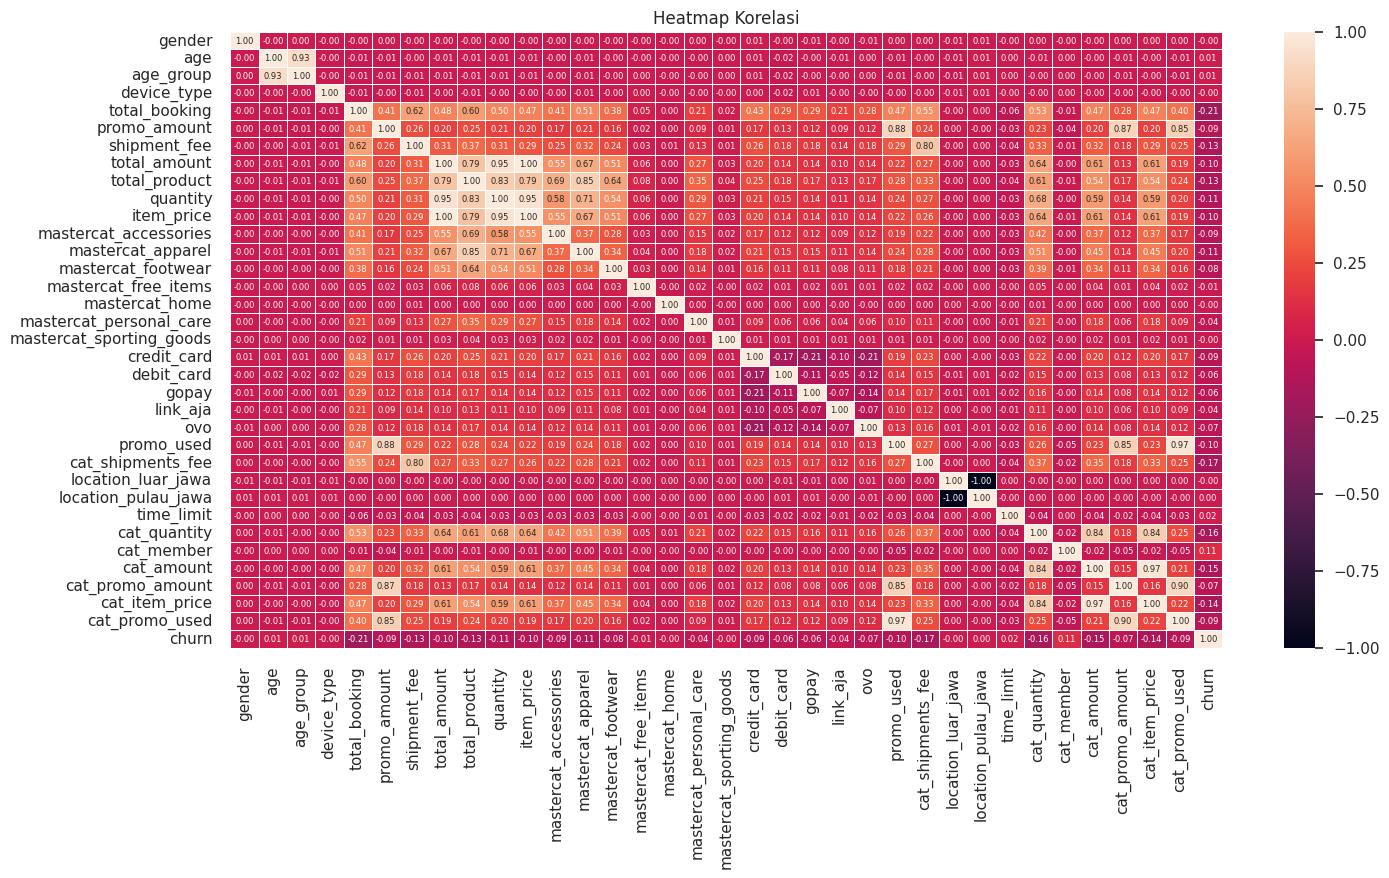

In [ ]:
corr_col = data_model2.select_dtypes(include=['number'])
correlation_matrix1 = corr_col.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", linewidths=0.5, annot_kws={'size': 6})
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
highest_corr = correlation_matrix1['churn'].sort_values(ascending=False)
print(highest_corr)

churn                       1.000000
cat_member                  0.111188
time_limit                  0.017519
age                         0.010613
age_group                   0.008000
location_pulau_jawa         0.002321
mastercat_home             -0.000402
device_type                -0.002097
location_luar_jawa         -0.002321
gender                     -0.004885
mastercat_sporting_goods   -0.004962
mastercat_free_items       -0.010182
link_aja                   -0.043023
mastercat_personal_care    -0.043878
debit_card                 -0.056107
gopay                      -0.064094
ovo                        -0.065988
cat_promo_amount           -0.066470
mastercat_footwear         -0.083150
promo_amount               -0.086285
mastercat_accessories      -0.086646
credit_card                -0.089846
cat_promo_used             -0.094052
promo_used                 -0.097401
item_price                 -0.100014
total_amount               -0.101111
quantity                   -0.105779
m

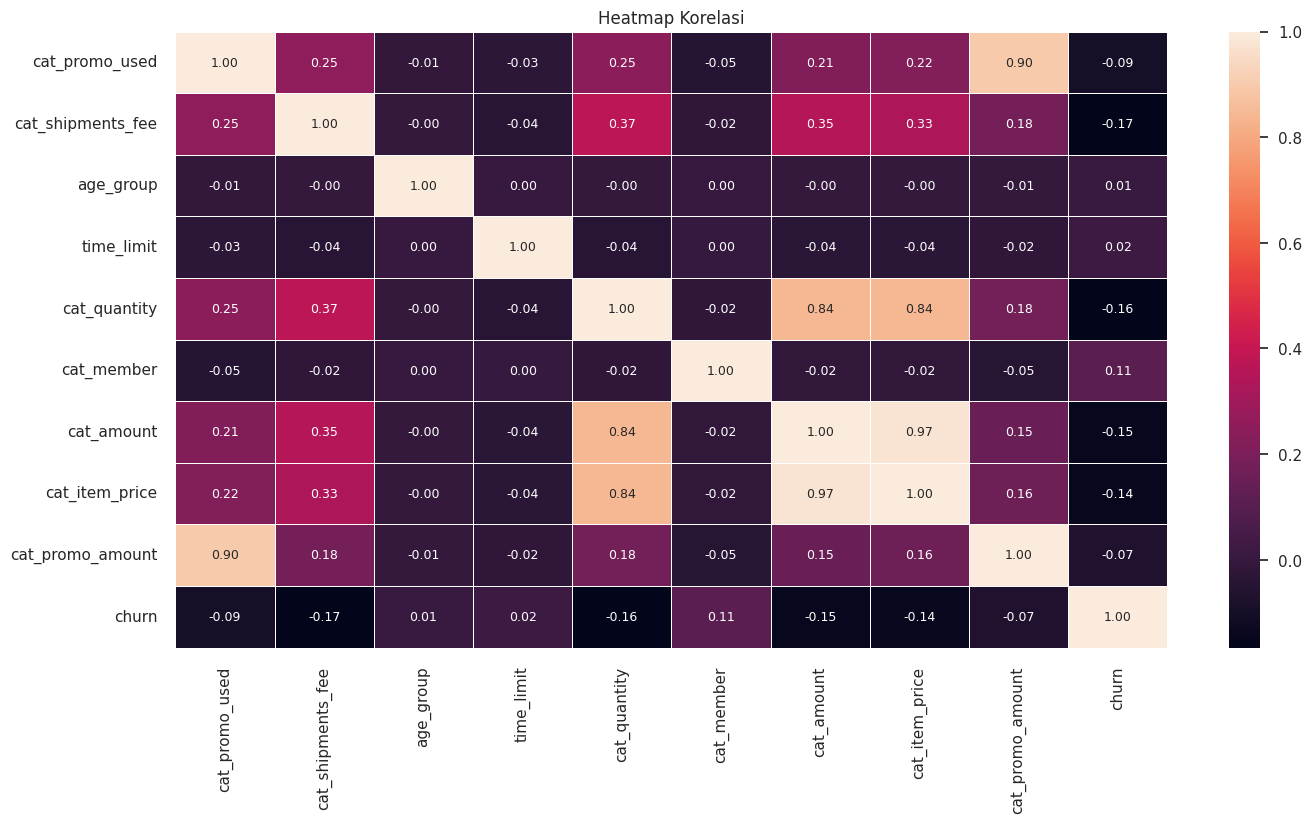

In [ ]:
corr_fe = data_model2[['cat_promo_used', 'cat_shipments_fee', 'age_group', 'time_limit', 'cat_quantity', 'cat_member', 'cat_amount', 'cat_item_price', 'cat_promo_amount', 'churn']]
correlation_matrix2 = corr_fe.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", linewidths=0.5, annot_kws={'size': 9}, cmap='rocket')
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
highest_fe = correlation_matrix2['churn'].sort_values(ascending=False)
print(highest_fe)

churn                1.000000
cat_member           0.111188
time_limit           0.017519
age_group            0.008000
cat_promo_amount    -0.066470
cat_promo_used      -0.094052
cat_item_price      -0.143853
cat_amount          -0.145047
cat_quantity        -0.162340
cat_shipments_fee   -0.166252
Name: churn, dtype: float64


# Splitting Data

In [ ]:
final_model = data_model2.copy()

In [ ]:
final_model = final_model.drop(columns=['age_group'])

In [ ]:
final_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515299 entries, 0 to 555566
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gender                    515299 non-null  int64  
 1   age                       515299 non-null  int64  
 2   device_type               515299 non-null  int64  
 3   total_booking             515299 non-null  Int64  
 4   promo_amount              515299 non-null  float64
 5   shipment_fee              515299 non-null  float64
 6   total_amount              515299 non-null  float64
 7   total_product             515299 non-null  Int64  
 8   quantity                  515299 non-null  Int64  
 9   item_price                515299 non-null  float64
 10  mastercat_accessories     515299 non-null  Int64  
 11  mastercat_apparel         515299 non-null  Int64  
 12  mastercat_footwear        515299 non-null  Int64  
 13  mastercat_free_items      515299 non-null  I

In [ ]:
# Splitting for rfecv
cols_to_drop = ['churn']
X = final_model.drop(cols_to_drop, axis=1)
y = final_model['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (360709, 33)
y_train dataset shape:  (360709,)
X_test dataset shape:  (154590, 33)
y_test dataset shape:  (154590,)


Visualize  Churn Proportion

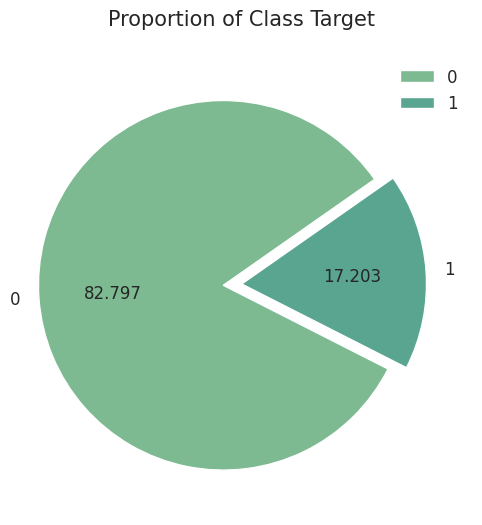

In [ ]:
# Distribution of training target
plt.figure(figsize=(6,6))
plt.pie(
        y_train.value_counts(),
        autopct='%.3f',
        explode=[0.1,0],
        labels=[0, 1],
        textprops={'fontsize': 12},
        colors=palette,
        startangle=35
)

plt.title("Proportion of Class Target",fontsize=15, pad=20)
plt.legend(fontsize=12, loc="best")
plt.show()

# Modelling

## Scoring Models

In [ ]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()
xgb = XGBClassifier(eval_metric='error')

models = [dtc, rfc, etc, gbc, knn, logreg, nb, xgb]

model_name = []

for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    model_name.append(names)

## Cross Validation

Traning seluruh data dengan cross validation

In [ ]:
# Cross validation for each model [dtc, rfc, etc, gbc, knn, logreg, nb, xgb]
dtc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[5], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[6], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[7], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.8s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent w

In [ ]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, etc_score, gbc_score,
    knn_score, logreg_score, nb_score, xgb_score
]

# Dataframe for k-fold score
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
DecisionTreeClassifier,0.723268,0.729381,0.733951,0.740423,0.749415
RandomForestClassifier,0.816010,0.817524,0.816408,0.815583,0.817600
ExtraTreesClassifier,0.794042,0.798321,0.797632,0.798816,0.802773
GradientBoostingClassifier,0.828042,0.828052,0.828071,0.828071,0.828089
KNeighborsClassifier,0.793984,0.796041,0.795740,0.797594,0.799882
LogisticRegression,0.828003,0.828003,0.828003,0.828003,0.828001
GaussianNB,0.599573,0.611537,0.605521,0.611207,0.714746
XGBClassifier,0.828129,0.828081,0.827537,0.827741,0.827769


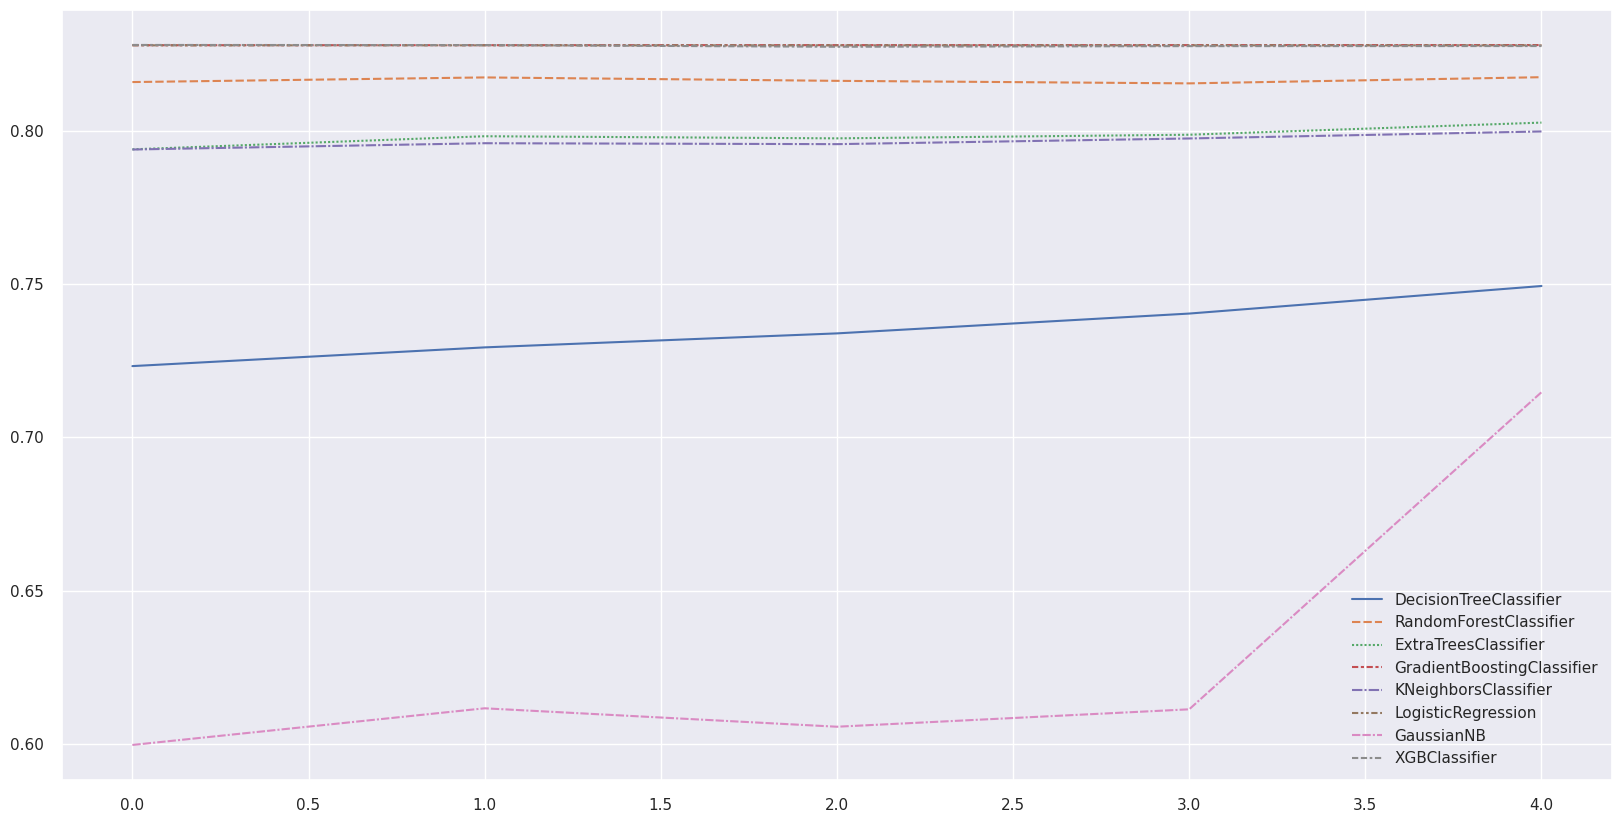

In [ ]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(data=df_cv_result.T)
plt.show()

In [ ]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

In [ ]:
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

In [ ]:
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

,score_mean,score_std
GradientBoostingClassifier,0.828065,1.642644e-05
LogisticRegression,0.828003,6.675667e-07
XGBClassifier,0.827851,2.224576e-04
RandomForestClassifier,0.816625,8.085009e-04
ExtraTreesClassifier,0.798317,2.787411e-03
KNeighborsClassifier,0.796648,1.981872e-03
DecisionTreeClassifier,0.735288,9.023445e-03
GaussianNB,0.628517,4.333578e-02


Pada analisis diatas didapatkan nilai rata-rata akurasi dan standard deviasi dari setiap k-fold validation. 3 model terbaik diantaranya Gradient Boosting, Logistic Regression, dan XGBoost

## Fit and Evaluation

Melakukan uji nilai akurasi pada data training dan testing untuk melihat akurasi saat data training dan testing dan perbedaaannya.

In [ ]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train, y_train)
    # accuracy for training set
    train_score.append(model.score(X_train, y_train))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

In [ ]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['test score'], ascending=[False])
df_avg_score

,train score,test score,difference
GradientBoostingClassifier,0.828080,0.828120,0.000039
LogisticRegression,0.827969,0.828081,0.000111
XGBClassifier,0.830065,0.827906,0.002159
RandomForestClassifier,0.999978,0.817407,0.182570
ExtraTreesClassifier,1.000000,0.799217,0.200783
KNeighborsClassifier,0.842180,0.795608,0.046573
DecisionTreeClassifier,1.000000,0.736645,0.263355
GaussianNB,0.618224,0.615907,0.002318


## Cross Validation (Some Metrics)

Melakukan pengukuran performa model dari metrik accuracy, precision, recall, dan f1-score

In [ ]:
skfold = StratifiedKFold(n_splits=5)

# Cross validation for each model [dtc, rfc, etc, gbc, knn, logreg, nb, xgb]
dtc_score = cross_validate(models[0], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[2], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[3], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[4], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[5], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[6], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[7], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.6s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [ ]:
cv_result = [
    dtc_score, rfc_score, etc_score, gbc_score,
    knn_score, logreg_score, nb_score, xgb_score
]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy', 'test_recall'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,GradientBoostingClassifier,147.790281,0.273833,0.828063,0.774693,0.000508,0.001015
1,LogisticRegression,2.292719,0.128331,0.828003,0.000000,0.000000,0.000000
2,XGBClassifier,6.720306,0.342564,0.827851,0.457281,0.004806,0.009511
3,RandomForestClassifier,101.998357,4.141148,0.816821,0.285299,0.043766,0.075746
4,ExtraTreesClassifier,87.394343,5.209220,0.798199,0.262187,0.095859,0.140072
5,KNeighborsClassifier,0.332215,307.597501,0.796648,0.220799,0.071951,0.108499
6,DecisionTreeClassifier,9.142497,0.165093,0.735686,0.251431,0.270845,0.260437
7,GaussianNB,0.514167,0.186049,0.628517,0.224307,0.465474,0.299277


Melihat dari hasil tersebut, perlu diperhatikan bahwa analisis terhadap data imbalance yang terpaut jauh. Gradient Boosting menjadi model terbaik untuk dari segi accuracy dan Precision. Namun, perlu melihat segi recall dan f1 (sebagai peminimalisir jumlah false negative dan false positive) sehingga XGB menjadi model yang perlu diperhitungkan kembali.

# Model :

Perbandingan performa model sebelum dan sesudah RFECV Selection

## Default Parameter

In [ ]:
# Fit classifier
xgb.fit(X_train, y_train)

# predict test set
y_pred_def = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb.score(X_train, y_train) * 100), 2)
test_score_def = round((xgb.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 83.01%
Test Accuracy : 82.79%
Precision Score : 46.09%
Recall Score : 0.6%
F1 Score : 1.18%


In [ ]:
# Fit classifier
gbc.fit(X_train, y_train)

# predict test set
y_pred_def = gbc.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((gbc.score(X_train, y_train) * 100), 2)
test_score_def = round((gbc.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 82.81%
Test Accuracy : 82.81%
Precision Score : 62.5%
Recall Score : 0.06%
F1 Score : 0.11%


Dari kedua model, dianggap XGBoost menjadi model untuk di analisis lebih lanjut dengan perhitungan XGBoost memiliki hasil yang lebih stabil dan dengan fit time yang lebih ringan

## RFECV Selecetion

Recursive Feature Elimination Cross Validation

In [ ]:
skf = StratifiedKFold(n_splits=5)

rfe = RFECV(xgb, cv=skf, scoring='accuracy', n_jobs=-1)
rfe = rfe.fit(X, y)

Optimal number of features : 10


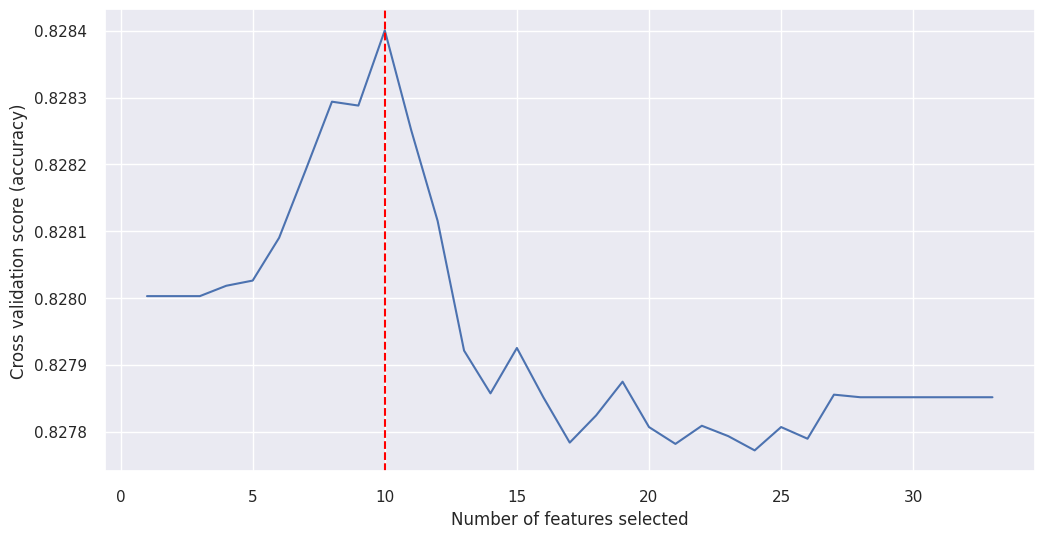

In [ ]:
print("Optimal number of features : %d" % rfe.n_features_)

plt.figure(figsize=(12, 6))
plt.plot(
    range(1, len(rfe.cv_results_['mean_test_score']) + 1),
    rfe.cv_results_['mean_test_score'],
)
plt.axvline(x=rfe.n_features_, color='red', ls='--')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.show()

In [ ]:
pd.DataFrame({'ranking':rfe.ranking_}, index=rfe.feature_names_in_).sort_values('ranking')

,ranking
gender,1
ovo,1
gopay,1
debit_card,1
credit_card,1
cat_member,1
location_luar_jawa,1
age,1
device_type,1
total_booking,1


In [ ]:
# list of relevant features
relevant_column = list(X.columns[rfe.support_])

# Filtering feature from RFE
df_rfe = final_model[relevant_column]

# Assign target
df_rfe['churn'] = y
df_rfe

<ipython-input-435-e6e505e80bf0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfe['churn'] = y


,gender,age,device_type,total_booking,credit_card,debit_card,gopay,ovo,location_luar_jawa,cat_member,churn
0,1,43,2,1,0,0,0,0,0,2,1
1,1,29,1,1,0,0,1,0,1,2,1
2,2,38,2,1,0,0,1,0,0,2,1
3,1,29,1,1,1,0,0,0,0,2,1
5,1,18,1,1,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
555558,2,24,1,1,1,0,0,0,0,1,0
555559,2,18,1,2,2,0,0,0,1,1,0
555563,2,34,1,2,2,0,0,0,0,1,0
555564,1,25,1,1,0,0,0,1,1,1,0


In [ ]:
# Separate features and target
X_rfe = df_rfe.drop('churn', axis=1)
y_rfe = df_rfe['churn']

# Separate train and test set for modelling
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y_rfe, test_size=0.3, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train_rfe.shape)
print('Shape of y_train', y_train_rfe.shape)
print('Shape of X_test', X_test_rfe.shape)
print('Shape of y_test', y_test_rfe.shape)

Shape of X_train (360709, 10)
Shape of y_train (360709,)
Shape of X_test (154590, 10)
Shape of y_test (154590,)


In [ ]:
xgb_rfe = XGBClassifier(eval_metric='error')
# Fit classifier
xgb_rfe.fit(X_train_rfe, y_train_rfe)

# Predict test set
y_pred_rfe = xgb_rfe.predict(X_test_rfe)

#Calculate accuracy, precision, recall, and f1-score
train_score_rfe = round((xgb_rfe.score(X_train_rfe, y_train_rfe) * 100), 2)
test_score_rfe = round((xgb_rfe.score(X_test_rfe, y_test_rfe) * 100), 2)
prec_score_rfe = round((precision_score(y_test_rfe, y_pred_rfe)) * 100, 2)
recall_score_rfe = round((recall_score(y_test_rfe, y_pred_rfe)) * 100, 2)
f1_rfe = round(f1_score(y_test_rfe, y_pred_rfe)*100, 2)

print('Training Accuracy : {}%'.format(train_score_rfe))
print('Test Accuracy : {}%'.format(test_score_rfe))
print('Precision Score : {}%'.format(prec_score_rfe))
print('Recall Score : {}%'.format(recall_score_rfe))
print('F1 Score : {}%'.format(f1_rfe))

Training Accuracy : 82.89%
Test Accuracy : 82.85%
Precision Score : 60.74%
Recall Score : 0.68%
F1 Score : 1.35%


In [ ]:
pd.DataFrame({
    'train_acc':[train_score_def, train_score_rfe],
    'test_acc':[test_score_def, test_score_rfe],
    'precision':[prec_score_def, prec_score_rfe],
    'recall':[recall_score_def, recall_score_rfe],
    'f1-score':[f1_def, f1_rfe]}, index=['without_rfe', 'with_rfe']
)

,train_acc,test_acc,precision,recall,f1-score
without_rfe,83.01,82.79,46.09,0.60,1.18
with_rfe,82.89,82.85,60.74,0.68,1.35


Dengan adanya RFECV ini mampu meningkatkan performa model terutama dari accuracy test, precision, recall, dan f1-score.

## Hyperparameter Tuning

In [ ]:
# params = {
#     'booster': ['gbtree', 'gblinear', 'dart'],
#     'eta': [0.1, 0.01, 0.001],
#     'gamma': [0.1, 0.01, 0.001],
#     'max_depth': range(10, 51, 5),
#     'min_child_weight': range(0, 26, 5), #
#     'tree_method': ['gpu_hist', 'auto', 'hist'],
#     'scale_pos_weight': range(0, 16, 3),
#     'max_delta_step': range(10, 101, 5),
#     'max_leaves': range(0, 21, 5),
#     'eval_metric': ['logloss', 'error', 'auc'],
#     'sampling_method': ['gradient_based', 'uniform'],
# }

# xgb_tuned = GridSearchCV(
#     estimator=XGBClassifier(),
#     param_distributions=params,
#     n_iter=50,
#     scoring='accuracy',
#     cv=5,
#     n_jobs=-1
# )

# GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

In [ ]:
param_grid = {
    'eval_metric': ['logloss', 'auc'],
    'n_estimators': [200],
    'max_depth':[5],
    'gamma':[0.01, 0.001, 0.0001],
    'eta':[0.01, 0.001, 0.0001],
    'scale_pos_weight': [1, 5, 10]
}

In [ ]:
modclass = XGBClassifier()
skf = StratifiedKFold(n_splits=5)
xgb_tuned = GridSearchCV(estimator=modclass, param_grid=param_grid, n_jobs=-1, cv=skf, scoring='accuracy')

In [ ]:
xgb_tuned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.01, 0.001, 0.0001],
                         'eval_metric': ['logloss', 'auc'],
                         'gamma': [0.01, 0.001, 0.0001], 'max_depth': [5],
                         'n_estimators': [200],
                         'scale_pos_weight': [1, 5, 10]},
             scoring='accuracy')

In [ ]:
xgb_tuned.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric='logloss',
              feature_types=None, gamma=0.01, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predict test set
y_pred_tuned = xgb_tuned.predict(X_test)

#Calculate accuracy, precision, recall, and f1-score
train_score_tuned = round((xgb_tuned.score(X_train, y_train) * 100), 2)
test_score_tuned = round((xgb_tuned.score(X_test, y_test) * 100), 2)
prec_score_tuned  = round((precision_score(y_test, y_pred_tuned)) * 100, 2)
recall_score_tuned  = round((recall_score(y_test, y_pred_tuned)) * 100, 2)
f1_tuned  = round(f1_score(y_test, y_pred_tuned)*100, 2)

print('Training Accuracy : {}%'.format(train_score_tuned))
print('Test Accuracy : {}%'.format(test_score_tuned))
print('Precision Score : {}%'.format(prec_score_tuned ))
print('Recall Score : {}%'.format(recall_score_tuned ))
print('F1 Score : {}%'.format(f1_tuned ))

Training Accuracy : 82.8%
Test Accuracy : 82.81%
Precision Score : 75.0%
Recall Score : 0.01%
F1 Score : 0.02%


In [ ]:
pd.DataFrame({
    'train_acc':[train_score_def, train_score_rfe, train_score_tuned],
    'test_acc':[test_score_def, test_score_def, test_score_tuned],
    'precision':[prec_score_def, prec_score_rfe, prec_score_tuned],
    'recall':[recall_score_def, recall_score_rfe, recall_score_tuned],
    'f1-score':[f1_def, f1_rfe, f1_tuned]}, index=['xgb_default', 'xgb_rfe', 'xgb_tuned']
)

,train_acc,test_acc,precision,recall,f1-score
xgb_default,83.01,82.79,46.09,0.60,1.18
xgb_rfe,82.89,82.79,60.74,0.68,1.35
xgb_tuned,82.80,82.81,75.00,0.01,0.02


Dengan hyperparameter tuning mampu meningkatkan kualitas accuracy dan precision yang cukup tinggi, namun ada kekurangan terhadap recall dan f1 yang sangat rendah sehingga jika mempertimbangkan kestabilan performa, model yang dipakai  adalah rfe dengan alasan lebih stabi

# Model Evaluation

## Confusion Matrix

[[127896    117]
 [ 26396    181]]


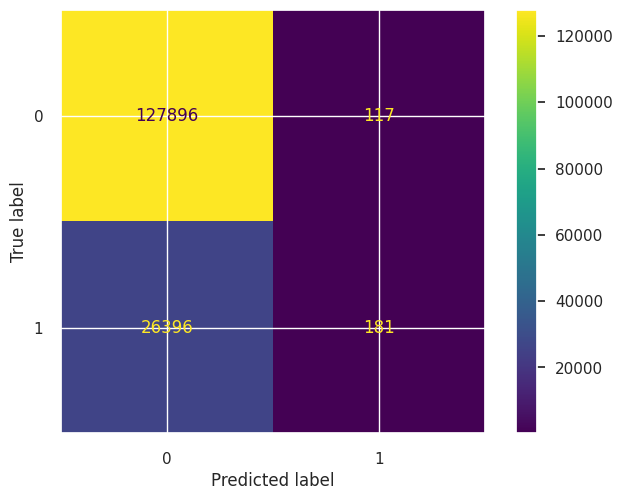

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_rfe, y_pred_rfe)
print(cm)
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Classification Report

In [ ]:
# Classification report model
cr = classification_report(y_test_rfe, y_pred_rfe)
print(cr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91    128013
           1       0.61      0.01      0.01     26577

    accuracy                           0.83    154590
   macro avg       0.72      0.50      0.46    154590
weighted avg       0.79      0.83      0.75    154590



## Precision Recall and ROC Curve

In [ ]:
# Precision Recall Curve
y_pred_rfe = xgb_rfe.predict_proba(X_test_rfe)[:,1]
prec, recall, _ = precision_recall_curve(y_test_rfe, y_pred_rfe, pos_label=xgb_rfe.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_rfe, y_pred_rfe)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

ROC AUC Score is : 0.7293774791912303


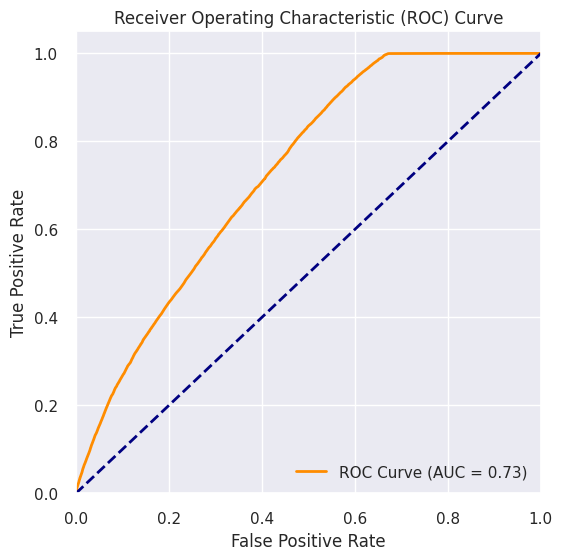

In [ ]:
# roc auc score
auc_score = roc_auc_score(y_test_rfe, y_pred_rfe)
print(f'ROC AUC Score is : {auc_score}')

# Plotting ROC Curve with dashed line
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Feature Importance

In [ ]:
feature_importance = pd.DataFrame({
    'Features':X_rfe.columns,
    'Importance':xgb_rfe.feature_importances_
}).sort_values('Importance', ascending=False)

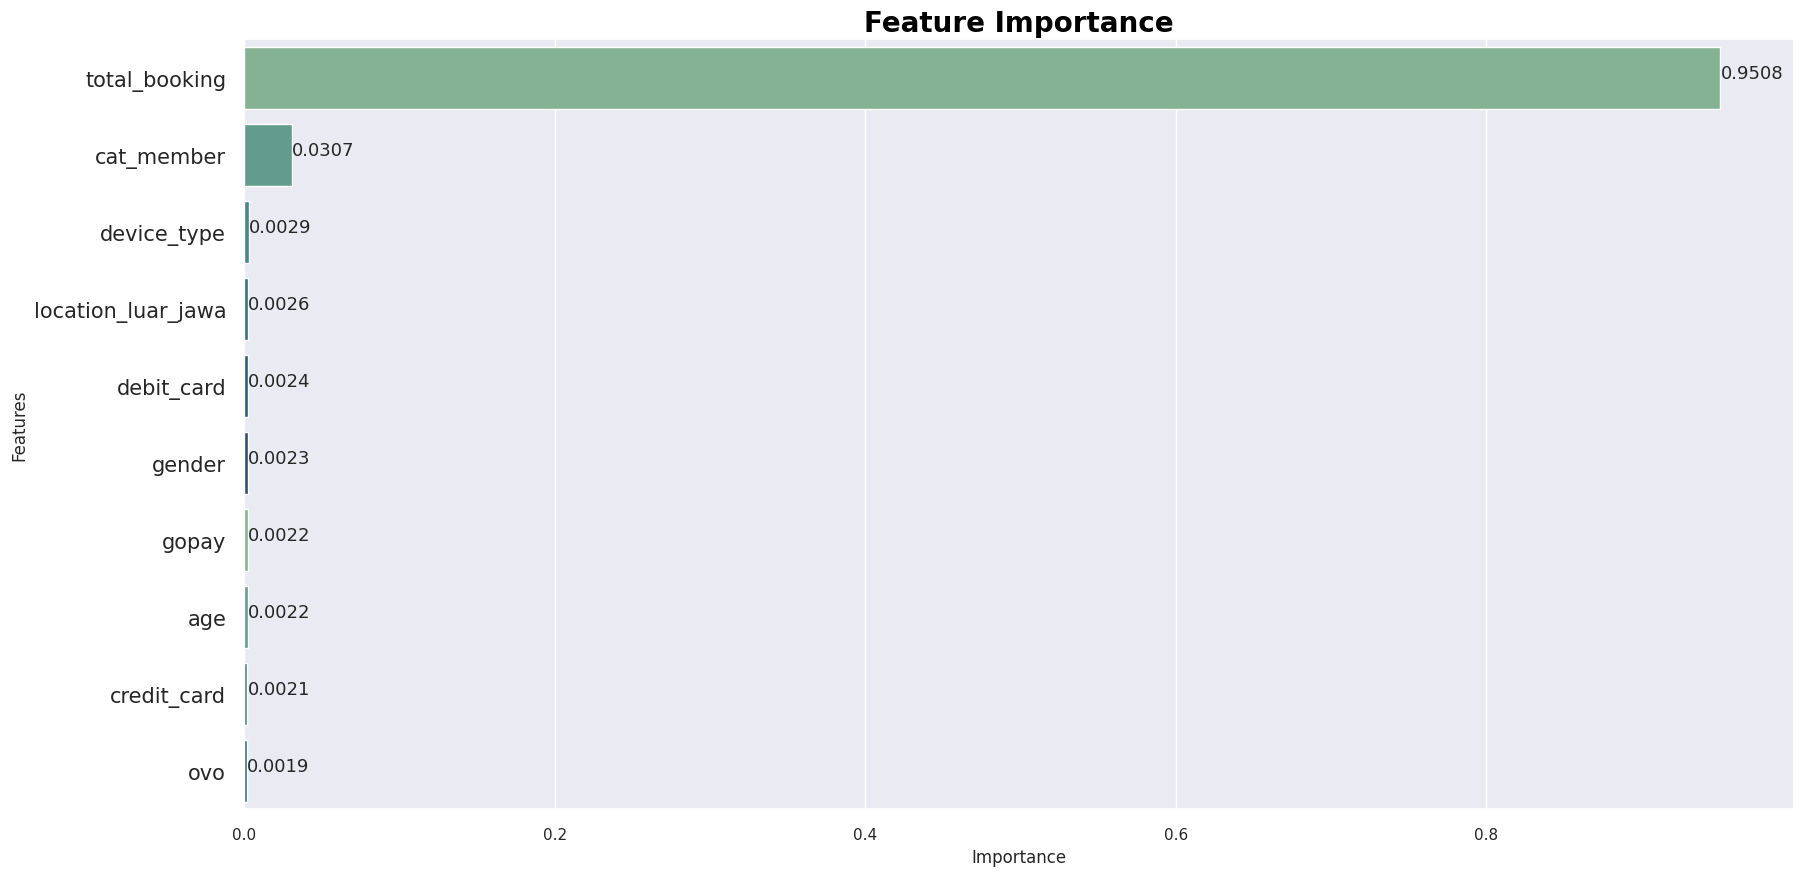

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(data=feature_importance, x='Importance', y='Features', palette=palette)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],i, round(x[i], 4), fontsize=13)

x = list(feature_importance['Importance'])
y = list(feature_importance['Features'])

plt.title('Feature Importance', fontsize=20, color='black', fontweight='bold')
plt.yticks(fontsize=15)
addlabels(x, y)
plt.show()

## Thresholds Adjustment

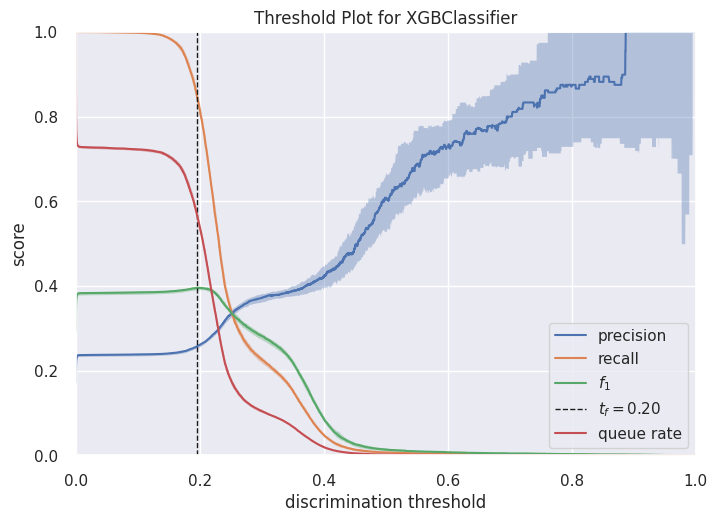

<Axes: title={'center': 'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [ ]:
# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(xgb_rfe)

# Fit the data to the visualizer
visualizer.fit(X_train_rfe, y_train_rfe)
# Finalize and render the figure
visualizer.show()

In [ ]:
# Create dataframe for appying thresholds
y_pred_final = pd.DataFrame({'churn':y_test_rfe.values, 'churn_prob':y_pred_rfe})
y_pred_final['final_prediction'] = y_pred_final['churn_prob'].apply(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head(10)

,churn,churn_prob,final_prediction
0,0,0.000164,0
1,0,0.000128,0
2,0,0.145983,0
3,0,0.217472,1
4,1,0.203733,1
5,0,0.000016,0
6,0,0.398233,1
7,0,0.000672,0
8,0,0.227260,1
9,0,0.191524,0


## Confusion Matrix

[[65952 62061]
 [ 4869 21708]]


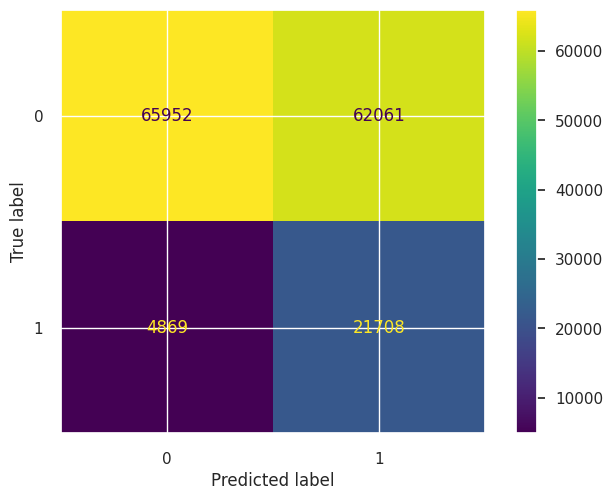

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_pred_final['churn'], y_pred_final['final_prediction'])
print(cm)
# Plotting confusion matrix
ConfusionMatrixDisplay(cm, display_labels=xgb_rfe.classes_).plot()
plt.show()

## Classification Report

In [ ]:
# Classification Report
cr = classification_report(y_pred_final['churn'], y_pred_final['final_prediction'])
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.52      0.66    128013
           1       0.26      0.82      0.39     26577

    accuracy                           0.57    154590
   macro avg       0.60      0.67      0.53    154590
weighted avg       0.82      0.57      0.62    154590



In [ ]:
# Model performance after thresholds adjustment
acc_score_th = round(accuracy_score(y_pred_final['churn'], y_pred_final['final_prediction']) * 100, 2)
prec_score_th = round(precision_score(y_pred_final['churn'], y_pred_final['final_prediction']) * 100, 2)
recall_score_th = round(recall_score(y_pred_final['churn'], y_pred_final['final_prediction']) * 100, 2)
f1_th = round(f1_score(y_pred_final['churn'], y_pred_final['final_prediction']) * 100, 2)

In [ ]:
pd.DataFrame({
    'accuracy':[test_score_rfe, acc_score_th],
    'precision':[prec_score_rfe, prec_score_th],
    'recall':[recall_score_rfe, recall_score_th],
    'f1-score':[f1_rfe, f1_th]}, index=['default', 'thresholds adjusment']
)

,accuracy,precision,recall,f1-score
default,82.85,60.74,0.68,1.35
thresholds adjusment,56.70,25.91,81.68,39.35


## XGB Decile Rank

In [ ]:
probatest = xgb_rfe.predict_proba(X_test_rfe)
probatest2 = pd.DataFrame(probatest, columns=['proba_0','proba_1'])

In [ ]:
probatest2

,proba_0,proba_1
0,0.999836,0.000164
1,0.999872,0.000128
2,0.854017,0.145983
3,0.782528,0.217472
4,0.796267,0.203733
...,...,...
154585,0.794047,0.205953
154586,0.579734,0.420266
154587,0.784477,0.215523
154588,0.646047,0.353953


In [ ]:
probatest2.describe()

,proba_0,proba_1
count,154590.000000,154590.000000
mean,0.827602,0.172398
std,0.119601,0.119601
min,0.005222,0.000001
25%,0.764326,0.001118
50%,0.794047,0.205953
75%,0.998882,0.235674
max,0.999999,0.994778


In [ ]:
y_test2 = y_test.reset_index(drop=False)
y_test2

,index,churn
0,418354,0
1,99745,0
2,370346,0
3,115673,0
4,258342,1
...,...,...
154585,58889,0
154586,3142,1
154587,543608,0
154588,11496,0


In [ ]:
df_proba_test = pd.concat([probatest2,y_test2],axis = 1)
df_proba_test2 = df_proba_test[['proba_1','churn']]
df_proba_test2

,proba_1,churn
0,0.000164,0
1,0.000128,0
2,0.145983,0
3,0.217472,0
4,0.203733,1
...,...,...
154585,0.205953,0
154586,0.420266,1
154587,0.215523,0
154588,0.353953,0


In [ ]:
target1 = df_proba_test2[df_proba_test2['churn'] == 1]
target1.describe()

,proba_1,churn
count,26577.000000,26577.0
mean,0.255638,1.0
std,0.079115,0.0
min,0.000232,1.0
25%,0.207405,1.0
50%,0.231827,1.0
75%,0.280278,1.0
max,0.994778,1.0


In [ ]:
target0 = df_proba_test2[df_proba_test2['churn'] == 0]
target0.describe()

,proba_1,churn
count,128013.000000,128013.0
mean,0.155116,0.0
std,0.119322,0.0
min,0.000001,0.0
25%,0.000424,0.0
50%,0.196798,0.0
75%,0.231703,0.0
max,0.990650,0.0


In [ ]:
df_proba_test2 = df_proba_test2.sort_values(by='proba_1', ascending=False)
df_proba_test2

,proba_1,churn
126430,0.994778,1
77685,0.990650,0
122400,0.984255,1
63149,0.983797,1
115420,0.981025,1
...,...,...
92502,0.000002,0
25073,0.000002,0
135962,0.000002,0
79167,0.000002,0


In [ ]:
df_proba_test2['Decile_rank'] = pd.qcut(df_proba_test2['proba_1'], 10, labels=False)
df_proba_test2['Decile_rank'] = df_proba_test2['Decile_rank'] + 1

In [ ]:
df_proba_test2

,proba_1,churn,Decile_rank
126430,0.994778,1,10
77685,0.990650,0,10
122400,0.984255,1,10
63149,0.983797,1,10
115420,0.981025,1,10
...,...,...,...
92502,0.000002,0,1
25073,0.000002,0,1
135962,0.000002,0,1
79167,0.000002,0,1


In [ ]:
df_proba_test2.to_csv('proba_decile.csv', index=False)

In [ ]:
df_proba_test2["Decile_rank"].value_counts()

4     15568
3     15485
9     15484
8     15478
1     15463
2     15455
6     15444
7     15411
10    15405
5     15397
Name: Decile_rank, dtype: int64

In [ ]:
df_pivot = df_proba_test2.groupby('Decile_rank').agg({'churn': ['sum', 'count']}).reset_index()
df_pivot.columns = ['Decile_rank', 'Churn', 'Total']

In [ ]:
df_pivot

,Decile_rank,Churn,Total
0,1,0,15463
1,2,4,15455
2,3,564,15485
3,4,2616,15568
4,5,3118,15397
5,6,3153,15444
6,7,3481,15411
7,8,3619,15478
8,9,4231,15484
9,10,5791,15405


# Save

Model

In [ ]:
import pickle

In [ ]:
xgb_rfe.fit(X_rfe,y_rfe)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pickle.dump(xgb_rfe, open('finalmodel_xgb.sav', 'wb'))

# Prediction

Load

In [ ]:
# model = pickle.load(open('finalmodel_xgboost.sav', 'rb'))
# model

Checking Prediction

In [ ]:
# X.iloc[[7], :]

In [ ]:
# model.predict(X.iloc[[7], :])

# Conclusion

Lorem Ipsum